<a href="https://colab.research.google.com/github/anmol-iisc/psa_dspi_rmdn12/blob/main/Assignment2_1_26Sep_0110AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Assignment 2: Exploratory Data Analysis on Diabetes Dataset

## Background
Diabetes is one of the most prevalent chronic diseases and creates significant burdens on healthcare systems. The **Diabetes 130-US hospitals dataset** contains over **100,000 records** of hospital admissions for diabetic patients across **130 U.S. hospitals (1999–2008)**. It includes more than **50 attributes**, covering demographics, admission details, diagnoses, lab results, medications, and hospital outcomes.  

Like many real-world healthcare datasets, it presents challenges such as missing values, categorical codes (ICD-9 diagnoses, drug prescriptions), imbalances in outcome variables (e.g., readmission), and inconsistent data formats. Conducting an in-depth **Exploratory Data Analysis (EDA)** will help uncover insights into patient demographics, treatment outcomes, and factors influencing readmission rates.  

---

## Objectives
The goal of this assignment is to conduct a comprehensive **qualitative and quantitative EDA** of the Diabetes dataset. You will:  

- **Understand** the dataset structure, including variables, data types, and overall composition.  
- **Detect and address** data quality issues, such as missing values, duplicates, and inconsistent categories.  
- **Conduct univariate, bivariate, and multivariate analysis** using both qualitative and quantitative EDA, supported by visualization techniques (bar charts, count plots, stacked charts, heatmaps) and statistical methods (descriptive statistics, distribution analysis, and exploration of variable relationships).  
- **Visualize** patterns and correlations to uncover key insights and trends.  

---

## Submission Instructions
- This is an **individual assignment** and carries **5% of the total marks** of this course.
- You should not discuss your progress or solutions with anyone else.  
- Use this **template Jupyter Notebook and dataset** for your work.  

At the beginning of the notebook, clearly state:  
1. **Your Name and Roll Number**  
2. **Python environment details** (version, libraries used).  
3. Whether you are running locally or on **Google Colab** (*preferred, to ensure all students work in a consistent environment*).  

Additional guidelines:  
- Ensure that your notebook is **fully reproducible**: every cell must run sequentially without errors to regenerate the results.  
- Submit a **single completed notebook file (.ipynb)** before the deadline.  

---


## Dataset Source
- Source of Data : https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- It represents **hospital admissions of diabetic patients** across 130 U.S. hospitals from 1999 to 2008.
- Read the **Variables Table** in the link above, which provides details of individual variables such as type, role, and description.

##  Dataset Overview - "Diabetes_dataset.csv"
- **Number of records:** ~101,766 hospital admissions  
- **Number of features:** 53  
- **Unit of analysis:** Each row represents **one hospital admission** for a patient (a patient can have multiple admissions).  
- **Target variable (Goal):** Predict whether a patient is **readmitted within 30 days** of discharge.  

###  Key Features with Mappings
- **Admission Type**: `admission_type_id` → mapped to `admission_type_desc`  
- **Discharge Disposition**: `discharge_disposition_id` → mapped to `discharge_desc`  
- **Admission Source**: `admission_source_id` → mapped to `admission_source_desc`  

---

##  Important Notes
- **Missing values:** Several features contain missing values, often recorded as `"?"` (not as `NaN`).   
- **ID columns:** Both numeric IDs and their human-readable descriptions are included after merging. IDs may be useful for re-checking or remapping, while descriptions are helpful for analysis.  


**Note:** Do not just run plots — write down **interpretations** of your findings.  
The goal is to practice *thinking about the data*, not just generating charts.


## 📌 Preamble: Environment Details

Before starting the assignment, please fill in the following:

- **Name**: Anmol Gupta  
- **Email**: anmolg@iisc.ac.in  
- **Environment**: Google Colab  

Run the code cell below to print your Python and library versions.


In [464]:
# Preamble: Environment Check

import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pandas version: 2.2.2
NumPy version: 2.0.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


## Load and Inspect the dataset structure

#### Load the dataset

In [465]:
df=pd.read_csv("Diabetes_dataset.csv")

#### Inspect the dataset

In [466]:
df.shape

(101766, 53)

In [467]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room


In [468]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [469]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Data Pre-processing (cleaning, transformation, handling missing values, etc.)

We can see that there are 53 columns in the original dataframe.

To make our job easier while performing analysis, let us break it down into separate (dummy) dataframes based on the column types.

##### **Numerical Columns**

In [471]:
numeric_df = df.select_dtypes(include='number')

In [472]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   encounter_id              101766 non-null  int64
 1   patient_nbr               101766 non-null  int64
 2   admission_type_id         101766 non-null  int64
 3   discharge_disposition_id  101766 non-null  int64
 4   admission_source_id       101766 non-null  int64
 5   time_in_hospital          101766 non-null  int64
 6   num_lab_procedures        101766 non-null  int64
 7   num_procedures            101766 non-null  int64
 8   num_medications           101766 non-null  int64
 9   number_outpatient         101766 non-null  int64
 10  number_emergency          101766 non-null  int64
 11  number_inpatient          101766 non-null  int64
 12  number_diagnoses          101766 non-null  int64
dtypes: int64(13)
memory usage: 10.1 MB


In [473]:
for col in numeric_df.columns:
    print(col, "has", numeric_df[col].duplicated().sum(), "duplicate values")

encounter_id has 0 duplicate values
patient_nbr has 30248 duplicate values
admission_type_id has 101758 duplicate values
discharge_disposition_id has 101740 duplicate values
admission_source_id has 101749 duplicate values
time_in_hospital has 101752 duplicate values
num_lab_procedures has 101648 duplicate values
num_procedures has 101759 duplicate values
num_medications has 101691 duplicate values
number_outpatient has 101727 duplicate values
number_emergency has 101733 duplicate values
number_inpatient has 101745 duplicate values
number_diagnoses has 101750 duplicate values


Since `encounter_id` has all unique values, it would not contribute towards identifying any relationship.

Hence, we can drop it from the original dataframe.

**NOTE**: We use the `numeric_df` only for analysis. Any operation we perform (like dropping a column) is performed on the ***orginal dataframe*** itself. Only for maintaining consistency and to avoid confusion later, we perform the same operation on the the dummy `numeric_df` also. The same would apply to other dummy dataframes that we create later too.

In [474]:
df.drop(columns=['encounter_id'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
numeric_df.drop(columns=['encounter_id'], inplace=True)

Let us check if any of our numerical columns has '?'

In [475]:
(numeric_df == '?').sum()

,0
patient_nbr,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0
number_outpatient,0
number_emergency,0


Let us do a high-level analysis of the remaining columns in numeric_df.

In [476]:
for col in numeric_df.columns:
    print('================================================')
    print('\033[1m'+col+'\033[0m')
    print('Number of unique values:',numeric_df[col].nunique(),"\n")
    print('Unique Values:',numeric_df[col].unique(),"\n\n")


patient_nbr
Number of unique values: 71518 

Unique Values: [  8222157  55629189  86047875 ... 140199494 120975314 175429310] 


admission_type_id
Number of unique values: 8 

Unique Values: [6 1 2 3 4 5 8 7] 


discharge_disposition_id
Number of unique values: 26 

Unique Values: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 


admission_source_id
Number of unique values: 17 

Unique Values: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 


time_in_hospital
Number of unique values: 14 

Unique Values: [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 


num_lab_procedures
Number of unique values: 118 

Unique Values: [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  9

The column `patient_nbr` contains a lot of **duplicate values**. This indicates that the patient was readmitted multiple times.

In [477]:
unique_patients = numeric_df['patient_nbr'].value_counts()
duplicate_records = unique_patients[unique_patients > 1]
duplicate_records

,count
patient_nbr,
88785891,40
43140906,28
88227540,23
1660293,23
23199021,23
...,...
38365956,2
69952545,2
93001626,2


We can add a new column `number_of_readmissions`, which will store the number of times that patient was readmitted.

Then, we keep the first record of that patient, and delete the rest.

In [478]:
df.shape

(101766, 52)

In [479]:
df['number_of_readmissions'] = df['patient_nbr'].map(unique_patients)
# Doing the same on the dummy dataframe for consistency purpose
numeric_df['number_of_readmissions'] = numeric_df['patient_nbr'].map(unique_patients)

# Drop duplicate patient records, keeping the first occurrence
df.drop_duplicates(subset=['patient_nbr'], keep='first', inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
numeric_df.drop_duplicates(subset=['patient_nbr'], keep='first', inplace=True)

In [480]:
df.shape

(71518, 53)

Hereafter. we can also remove the column patient_nbr, as now it contains all unique values, and would not contribute towards identifying any relationship.

In [481]:
df.drop(columns=['patient_nbr'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
numeric_df.drop(columns=['patient_nbr'], inplace=True)

The columns `admission_type_id`, `discharge_disposition_id` and `admission_source_id` have already been mapped to categorical columns `admission_type_desc`, `discharge_desc`, and `admission_source_desc` respectively.

Since our current goal is to only do EDA on the data, we can remove these numerical columns.  

In [482]:
df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
numeric_df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)

In [483]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   time_in_hospital        71518 non-null  int64
 1   num_lab_procedures      71518 non-null  int64
 2   num_procedures          71518 non-null  int64
 3   num_medications         71518 non-null  int64
 4   number_outpatient       71518 non-null  int64
 5   number_emergency        71518 non-null  int64
 6   number_inpatient        71518 non-null  int64
 7   number_diagnoses        71518 non-null  int64
 8   number_of_readmissions  71518 non-null  int64
dtypes: int64(9)
memory usage: 5.5 MB


Some of these columns can benefit from binning - but let us look at it once we come to univariate analysis.
Other than that, from a data cleaning point-of-view, we are done with the numercial columns.

We will come back to the numerical columns later, if needed.

##### **Object Type Columns**

In [484]:
object_df = df.select_dtypes(include='object')

In [485]:
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   weight                    71518 non-null  object
 4   payer_code                71518 non-null  object
 5   medical_specialty         71518 non-null  object
 6   diag_1                    71518 non-null  object
 7   diag_2                    71518 non-null  object
 8   diag_3                    71518 non-null  object
 9   max_glu_serum             3456 non-null   object
 10  A1Cresult                 12986 non-null  object
 11  metformin                 71518 non-null  object
 12  repaglinide               71518 non-null  object
 13  nateglinide               71518 non-null  object
 14  chlorpropamide            

We still have 40 columns as object data type.

So let us try to split them further.

In [486]:
object_df.columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_desc', 'admission_source_desc'],
      dtype='object')

In [487]:
drug_columns = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [488]:
non_drug_columns = ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult','change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_desc', 'admission_source_desc']

In [489]:
drug_df = object_df[drug_columns]
drug_df.columns.nunique()

23

In [490]:
non_drug_df = object_df[non_drug_columns]
non_drug_df.columns.nunique()

17

###### Let us start with the **drug columns**.

In [491]:
df.shape

(71518, 49)

In [492]:
for col in drug_df.columns:
    print(col, "has", drug_df[col].nunique(), "unique values")

metformin has 4 unique values
repaglinide has 4 unique values
nateglinide has 4 unique values
chlorpropamide has 4 unique values
glimepiride has 4 unique values
acetohexamide has 2 unique values
glipizide has 4 unique values
glyburide has 4 unique values
tolbutamide has 2 unique values
pioglitazone has 4 unique values
rosiglitazone has 4 unique values
acarbose has 3 unique values
miglitol has 4 unique values
troglitazone has 2 unique values
tolazamide has 2 unique values
examide has 1 unique values
citoglipton has 1 unique values
insulin has 4 unique values
glyburide-metformin has 4 unique values
glipizide-metformin has 2 unique values
glimepiride-pioglitazone has 1 unique values
metformin-rosiglitazone has 2 unique values
metformin-pioglitazone has 2 unique values


We can see that `examide`, `citoglipton` and `glimepiride-pioglitazone` have only one unique value. So we can drop them from the original dataframe.

In [493]:
df.drop(columns=['examide', 'citoglipton','glimepiride-pioglitazone'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
drug_df.drop(columns=['examide', 'citoglipton','glimepiride-pioglitazone'], inplace=True)

/tmp/ipython-input-3930404362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df.drop(columns=['examide', 'citoglipton','glimepiride-pioglitazone'], inplace=True)


In [494]:
drug_df.isnull().sum()

,0
metformin,0
repaglinide,0
nateglinide,0
chlorpropamide,0
glimepiride,0
acetohexamide,0
glipizide,0
glyburide,0
tolbutamide,0
pioglitazone,0


In [495]:
(drug_df == '?').sum()

,0
metformin,0
repaglinide,0
nateglinide,0
chlorpropamide,0
glimepiride,0
acetohexamide,0
glipizide,0
glyburide,0
tolbutamide,0
pioglitazone,0


In [496]:
for col in drug_df.columns:
    print('================================================')
    print('\033[1m'+col+'\033[0m')
    print('Number of unique values:',drug_df[col].nunique(),"\n")
    print('Unique Values:',drug_df[col].unique(),"\n")
    print('Number of null values:',drug_df[col].isnull().sum(),"\n")
    print('Value Counts:')
    print(drug_df[col].value_counts().rename_axis(None),"\n")
    print('Value Counts in Percentage:')
    print(drug_df[col].value_counts(normalize=True).rename_axis(None)*100,"\n\n")

metformin
Number of unique values: 4 

Unique Values: ['No' 'Steady' 'Up' 'Down'] 

Number of null values: 0 

Value Counts:
No        56527
Steady    13718
Up          838
Down        435
Name: count, dtype: int64 

Value Counts in Percentage:
No        79.038843
Steady    19.181185
Up         1.171733
Down       0.608238
Name: proportion, dtype: float64 


repaglinide
Number of unique values: 4 

Unique Values: ['No' 'Up' 'Steady' 'Down'] 

Number of null values: 0 

Value Counts:
No        70592
Steady      824
Up           73
Down         29
Name: count, dtype: int64 

Value Counts in Percentage:
No        98.705221
Steady     1.152157
Up         0.102072
Down       0.040549
Name: proportion, dtype: float64 


nateglinide
Number of unique values: 4 

Unique Values: ['No' 'Steady' 'Down' 'Up'] 

Number of null values: 0 

Value Counts:
No        71020
Steady      474
Up           16
Down          8
Name: count, dtype: int64 

Value Counts in Percentage:
No        99.303672
Steady   

The columns `nateglinide`, `chlorpropamide`, `acetohexamide`, `tolbutamide`, `acarbose`, `miglitol`, `troglitazone`, `tolazamide`, `glyburide-metformin`, `glipizide-metformin`, `metformin-rosiglitazone`, `metformin-pioglitazone` all have more than 99% concentration of records in a single value. Thus, we can drop all these columns.

**NOTE/Disclaimer**: I did not initially remove these columns. However, while doing the Univariate Analysis and plotting the distributions for the drug columns, I realized that for many of them, only one value was visible. Hence, added this additional data cleaning step here.

In [497]:
df.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
drug_df.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace=True)

/tmp/ipython-input-1795007246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df.drop(columns=['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace=True)


In [498]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   metformin      71518 non-null  object
 1   repaglinide    71518 non-null  object
 2   glimepiride    71518 non-null  object
 3   glipizide      71518 non-null  object
 4   glyburide      71518 non-null  object
 5   pioglitazone   71518 non-null  object
 6   rosiglitazone  71518 non-null  object
 7   insulin        71518 non-null  object
dtypes: object(8)
memory usage: 4.9+ MB


From data cleaning, point-of-view, these columns look fine. None of them have any null values, and all of them have between two to four categorical values.

###### Let us continue with the **non-drug columns**.

In [499]:
for col in non_drug_df.columns:
    print(col, "has", non_drug_df[col].duplicated().sum(), "duplicate values")

race has 71512 duplicate values
gender has 71515 duplicate values
age has 71508 duplicate values
weight has 71508 duplicate values
payer_code has 71500 duplicate values
medical_specialty has 71447 duplicate values
diag_1 has 70821 duplicate values
diag_2 has 70792 duplicate values
diag_3 has 70759 duplicate values
max_glu_serum has 71514 duplicate values
A1Cresult has 71514 duplicate values
change has 71516 duplicate values
diabetesMed has 71516 duplicate values
readmitted has 71515 duplicate values
admission_type_desc has 71510 duplicate values
discharge_desc has 71492 duplicate values
admission_source_desc has 71501 duplicate values


In [500]:
(non_drug_df == '?').sum()

,0
race,1948
gender,0
age,0
weight,68665
payer_code,31043
medical_specialty,34477
diag_1,11
diag_2,294
diag_3,1225
max_glu_serum,0


Replacing all '?' with null values.

In [501]:
df.replace("?", np.nan, inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df.replace("?", np.nan, inplace=True)

/tmp/ipython-input-876314273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drug_df.replace("?", np.nan, inplace=True)


In [502]:
non_drug_df.isnull().sum()

,0
race,1948
gender,0
age,0
weight,68665
payer_code,31043
medical_specialty,34477
diag_1,11
diag_2,294
diag_3,1225
max_glu_serum,68062


In [503]:
percent_missing = non_drug_df.isnull().sum()*100/len(df)
percent_missing_sorted = percent_missing.sort_values(ascending=False)
percent_missing_sorted

,0
weight,96.010794
max_glu_serum,95.167650
A1Cresult,81.842333
medical_specialty,48.207444
payer_code,43.405856
admission_source_desc,6.919936
admission_type_desc,6.415168
discharge_desc,3.459269
race,2.723790
diag_3,1.712856


Columns `weight`, `max_glu_serum`, `A1Cresult` have very very high null value percentages, so we can drop them from the original dataframe.

In [504]:
df.drop(columns=['weight', 'max_glu_serum', 'A1Cresult'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df.drop(columns=['weight', 'max_glu_serum', 'A1Cresult'], inplace=True)

/tmp/ipython-input-2845509147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drug_df.drop(columns=['weight', 'max_glu_serum', 'A1Cresult'], inplace=True)


Columns `medical_specialty` and `payer_code` also have a significant percentage of null values, but let us analyze them a bit more.

**The column `medical_specialty`**

In [505]:
non_drug_df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Neurology',
       'Podiatry', 'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Surgery-Plastic', 'Ophthalmology', 'Surgery-Pediatric',
       'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

Let us keep `medical_specialty` for now, as some of this information might be useful (despite the significant null value count).

Let us impute the missing values as a new value 'Unknown'.

In [506]:
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df['medical_specialty'] = non_drug_df['medical_specialty'].fillna('Unknown')

/tmp/ipython-input-2342112168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drug_df['medical_specialty'] = non_drug_df['medical_specialty'].fillna('Unknown')


**The column `payer_code`**

In [507]:
df['payer_code'].unique()

array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

Let us remove `payer_code`, as anyway it should not contribute to readmission, along wiht having a large percentage of null values.  

In [508]:
df.drop(columns=['payer_code'], inplace=True)
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df.drop(columns=['payer_code'], inplace=True)

/tmp/ipython-input-1142169840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drug_df.drop(columns=['payer_code'], inplace=True)


Let us do a high-level analysis of the remaining columns in non_drug_df.

In [509]:
for col in non_drug_df.columns:
    print('================================================')
    print('\033[1m'+col+'\033[0m')
    print('Number of unique values:',non_drug_df[col].nunique(),"\n")
    print('Unique Values:',non_drug_df[col].unique(),"\n")
    print('Number of null values:',non_drug_df[col].isnull().sum(),"\n\n")

race
Number of unique values: 5 

Unique Values: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic'] 

Number of null values: 1948 


gender
Number of unique values: 3 

Unique Values: ['Female' 'Male' 'Unknown/Invalid'] 

Number of null values: 0 


age
Number of unique values: 10 

Unique Values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

Number of null values: 0 


medical_specialty
Number of unique values: 71 

Unique Values: ['Pediatrics-Endocrinology' 'Unknown' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatr

Let us pick these up one by one.

**The column `race`**

Imputing all null values with the value 'Unknown'

In [510]:
print(df['race'].isnull().sum())

1948


In [511]:
df['race'] = df['race'].fillna('Unknown')
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df['race'] = non_drug_df['race'].fillna('Unknown')

/tmp/ipython-input-2112190087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_drug_df['race'] = non_drug_df['race'].fillna('Unknown')


In [512]:
print(df['race'].isnull().sum())

0


In [513]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Unknown', 'Other', 'Asian',
       'Hispanic'], dtype=object)

**The column `gender`**

In [514]:
non_drug_df['gender'].value_counts()

,count
gender,
Female,38025
Male,33490
Unknown/Invalid,3


In 2025, it is iniquitous to disregard non-binary genders. However, since the dataset contains only 3 rows with 'Unknown/Invalid' - as compared to 101,763 rows with Female/Male - we would not be able to derive any meaningful analysis from keeping these rows. Hence, we drop these rows.

In [515]:
df = df.drop(df[df['gender'] == 'Unknown/Invalid'].index)
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df = non_drug_df.drop(non_drug_df[non_drug_df['gender'] == 'Unknown/Invalid'].index)

In [516]:
df['gender'].value_counts()

,count
gender,
Female,38025
Male,33490


In [517]:
df.shape

(71515, 30)

**The column `age`**

In [518]:
non_drug_df['age'].value_counts()

,count
age,
[70-80),18208
[60-70),15959
[50-60),12466
[80-90),11589
[40-50),6878
[30-40),2699
[90-100),1900
[20-30),1127
[10-20),535


Seems fine, so keeping it as is.

**The column `medical_specialty`**

In [519]:
non_drug_df['medical_specialty'].value_counts()

,count
medical_specialty,
Unknown,34475
InternalMedicine,10919
Family/GeneralPractice,5118
Emergency/Trauma,4465
Cardiology,4265
...,...
SportsMedicine,1
Speech,1
Perinatology,1


Seems fine for now, so keeping it as is.

**The columns `diag_1`, `diag_2`, `diag_3`**

These three columns are the primary, secondary and additional secondary diagnosis respectively, coded as first three digits of ICD9.

Let us transform them into their equivalent categories.

Source: Wikipedia

The following is a list of codes for International Statistical Classification of Diseases and Related Health Problems.



*   List of ICD-9 codes 001-139: infectious and parasitic diseases
*   List of ICD-9 codes 140-239: neoplasms
*   List of ICD-9 codes 240-279: endocrine, nutritional and metabolic diseases, and immunity disorders
*   List of ICD-9 codes 280-289: diseases of the blood and blood-forming organs
*   List of ICD-9 codes 290-319: mental disorders
*   List of ICD-9 codes 320-389: diseases of the nervous system and sense organs
*   List of ICD-9 codes 390-459: diseases of the circulatory system
*   List of ICD-9 codes 460-519: diseases of the respiratory system
*   List of ICD-9 codes 520-579: diseases of the digestive system
*   List of ICD-9 codes 580-629: diseases of the genitourinary system
*   List of ICD-9 codes 630-679: complications of pregnancy, childbirth, and the puerperium
*   List of ICD-9 codes 680-709: diseases of the skin and subcutaneous tissue
*   List of ICD-9 codes 710-739: diseases of the musculoskeletal system and connective tissue
*   List of ICD-9 codes 740-759: congenital anomalies
*   List of ICD-9 codes 760-779: certain conditions originating in the perinatal period
*   List of ICD-9 codes 780-799: symptoms, signs, and ill-defined conditions
*   List of ICD-9 codes 800-999: injury and poisoning
*   List of ICD-9 codes E and V codes: external causes of injury and supplemental classification

Firstly, let us impute the missing values with '-1'.

In [520]:
for col in ['diag_1', 'diag_2', 'diag_3']:
  print(col,non_drug_df[col].isnull().sum())

diag_1 11
diag_2 294
diag_3 1225


In [521]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].fillna('-1')
    # Doing the same on the dummy dataframe for consistency purpose
    non_drug_df[col] = non_drug_df[col].fillna('-1')

In [522]:
for col in ['diag_1', 'diag_2', 'diag_3']:
  print(col,df[col].isnull().sum())

diag_1 0
diag_2 0
diag_3 0


Now, let us transform the numbers into categories, based on the ICD-9 Code.

In [523]:
def transform_diag(icd9_code):
    if icd9_code.lower().startswith(('e', 'v')):
        category = 'External Causes of Injury'
        return category
    else:
        value = float(icd9_code)

        if value>=1 and value<=139:
            category = 'Infectious and Parasitic Diseases'
        elif value>=140 and value<=239:
            category = 'Neoplasms'
        elif value>=240 and value<=279:
            category = 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
        elif value>=280 and value<=289:
            category = 'Diseases of the Blood and Blood-Forming Organs'
        elif value>=290 and value<=319:
            category = 'Mental Disorders'
        elif value>=320 and value<=389:
            category = 'Diseases of Nervous System and Sense Organs'
        elif value>=390 and value<=459:
            category = 'Diseases of Circulatory System'
        elif value>=460 and value<=519:
            category = 'Diseases of Respiratory System'
        elif value>=520 and value<=579:
            category = 'Diseases of Digestive System'
        elif value>=580 and value<=629:
            category = 'Diseases of Genitourinary System'
        elif value>=630 and value<=679:
            category = 'Complications of Pregnancy, Childbirth, and Puerperium'
        elif value>=680 and value<=709:
            category = 'Diseases of Skin and Subcutaneous Tissue'
        elif value>=710 and value<=739:
            category = 'Diseases of Musculoskeletal System and Connective Tissue'
        elif value>=740 and value<=759:
            category = 'Congenital Anomalies'
        elif value>=760 and value<=779:
            category = 'Diseases of Perinatal Period'
        elif value>=780 and value<=799:
            category = 'Symptoms, Signs, and Ill-defined Conditions'
        elif value>=800 and value<=999:
            category = 'Injury and Poisoning'
        elif value == -1:
            category = 'Unknown'
        else: #Should not enter this as we have covered all scenarios
            category = 'Other'

        return category

In [524]:
for col in ['diag_1', 'diag_2', 'diag_3']:
  df[col] = df[col].apply(transform_diag)
  # Doing the same on the dummy dataframe for consistency purpose
  non_drug_df[col] = non_drug_df[col].apply(transform_diag)

In [525]:
for col in ['diag_1', 'diag_2', 'diag_3']:
    print('================================================')
    print('\033[1m'+col+'\033[0m')
    print('Number of unique values:',df[col].nunique(),"\n")
    print('Unique Values:',df[col].unique(),"\n")

diag_1
Number of unique values: 18 

Unique Values: ['Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
 'Complications of Pregnancy, Childbirth, and Puerperium'
 'Infectious and Parasitic Diseases' 'Neoplasms'
 'Diseases of Circulatory System' 'Diseases of Respiratory System'
 'Injury and Poisoning' 'Diseases of Skin and Subcutaneous Tissue'
 'Diseases of Musculoskeletal System and Connective Tissue'
 'Diseases of Digestive System' 'External Causes of Injury'
 'Symptoms, Signs, and Ill-defined Conditions'
 'Diseases of Genitourinary System' 'Mental Disorders'
 'Diseases of Nervous System and Sense Organs'
 'Diseases of the Blood and Blood-Forming Organs' 'Unknown'
 'Congenital Anomalies'] 

diag_2
Number of unique values: 18 

Unique Values: ['Unknown'
 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
 'Neoplasms' 'Diseases of Circulatory System'
 'Diseases of Respiratory System'
 'Diseases of the Blood and Blood-Forming Organs' 'Injury and 

**The column `change`**

This is already a categorical column with no null values, and two unique values ('No' and 'Ch'). So keeping as is.

**The column `diabetesMed`**

This is already a categorical column with no null values, and two unique values ('No' and 'Yes'). So keeping as is.

**The columns `admission_type_desc`, `discharge_desc`, `admission_source_desc`**

These are already categorical columns.

First, let us impute the null values.

Imputing all null values with the value 'Unknown'

In [526]:
for col in ['admission_type_desc', 'discharge_desc', 'admission_source_desc']:
  print(col,df[col].isnull().sum())

admission_type_desc 4588
discharge_desc 2474
admission_source_desc 4949


In [527]:
for col in ['admission_type_desc', 'discharge_desc', 'admission_source_desc']:
  df[col] = df[col].fillna('Unknown')
  # Doing the same on the dummy dataframe for consistency purpose
  non_drug_df[col] = non_drug_df[col].fillna('Unknown')

In [528]:
for col in ['admission_type_desc', 'discharge_desc', 'admission_source_desc']:
  print(col,df[col].isnull().sum())

admission_type_desc 0
discharge_desc 0
admission_source_desc 0


Let us look at the columns of `discharge_desc` again.

In [529]:
non_drug_df['discharge_desc'].unique()

array(['Not Mapped', 'Discharged to home',
       'Discharged/transferred to SNF',
       'Discharged/transferred to home with home health service',
       'Discharged/transferred to another short term hospital',
       'Discharged/transferred to another type of inpatient care institution',
       'Expired', 'Left AMA',
       'Neonate discharged to another hospital for neonatal aftercare',
       'Hospice / medical facility', 'Discharged/transferred to ICF',
       'Unknown',
       'Discharged/transferred to home under care of Home IV provider',
       'Still patient or expected to return for outpatient services',
       'Hospice / home',
       'Discharged/transferred/referred to this institution for outpatient services',
       'Discharged/transferred/referred another institution for outpatient services',
       'Discharged/transferred to another rehab fac including rehab units of a hospital .',
       'Discharged/transferred to a long term care hospital.',
       'Admitted as an i

We have a few columns where the patients have expired.

Unfortunately, they have no scope of getting re-admitted, so we drop those records.  

In [530]:
df = df.drop(df[df['discharge_desc'].str.contains('Expired', case=False)].index)
# Doing the same on the dummy dataframe for consistency purpose
non_drug_df = non_drug_df.drop(non_drug_df[non_drug_df['discharge_desc'].str.contains('Expired', case=False)].index)

In [531]:
df.shape

(70431, 30)

NOTE: Practically, even the patients who are advised Hospice care do not have a realistic chance at readmission.

However, the humane side of me believes in mircales - so I am not dropping those patient records.

**The column `readmitted`**

Finally, we come to our target variable - `readmitted`.

This column is already categorial, with three unique values.

However, to make things interesting, let us create another column `readmitted_binary` with just two values - 'Yes' and 'No'. We map '>30' and '<30' both to 'Yes'.

In [532]:
df['readmitted_binary'] = df['readmitted']
df['readmitted_binary'] = df['readmitted_binary'].str.replace('>30', 'Yes')
df['readmitted_binary'] = df['readmitted_binary'].str.replace('<30', 'Yes')
df['readmitted_binary'] = df['readmitted_binary'].str.replace('NO', 'No')

# Doing the same on the dummy dataframe for consistency purpose
non_drug_df['readmitted_binary'] = non_drug_df['readmitted']
non_drug_df['readmitted_binary'] = non_drug_df['readmitted_binary'].str.replace('>30', 'Yes')
non_drug_df['readmitted_binary'] = non_drug_df['readmitted_binary'].str.replace('<30', 'Yes')
non_drug_df['readmitted_binary'] = non_drug_df['readmitted_binary'].str.replace('NO', 'No')

In [533]:
df['readmitted_binary'].unique()

array(['No', 'Yes'], dtype=object)

##### **Final Look of the DataFrame After Data Pre-Processing**

In [534]:
df.shape

(70431, 31)

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70431 entries, 0 to 101765
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    70431 non-null  object
 1   gender                  70431 non-null  object
 2   age                     70431 non-null  object
 3   time_in_hospital        70431 non-null  int64 
 4   medical_specialty       70431 non-null  object
 5   num_lab_procedures      70431 non-null  int64 
 6   num_procedures          70431 non-null  int64 
 7   num_medications         70431 non-null  int64 
 8   number_outpatient       70431 non-null  int64 
 9   number_emergency        70431 non-null  int64 
 10  number_inpatient        70431 non-null  int64 
 11  diag_1                  70431 non-null  object
 12  diag_2                  70431 non-null  object
 13  diag_3                  70431 non-null  object
 14  number_diagnoses        70431 non-null  int64 
 15  metfor

In [536]:
df.head(15)

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc,number_of_readmissions,readmitted_binary
0,Caucasian,Female,[0-10),1,Pediatrics-Endocrinology,41,0,1,0,0,...,No,No,No,No,NO,Unknown,Not Mapped,Physician Referral,1,No
1,Caucasian,Female,[10-20),3,Unknown,59,0,18,0,0,...,No,Up,Ch,Yes,>30,Emergency,Discharged to home,Emergency Room,1,Yes
2,AfricanAmerican,Female,[20-30),2,Unknown,11,5,13,2,0,...,No,No,No,Yes,NO,Emergency,Discharged to home,Emergency Room,1,No
3,Caucasian,Male,[30-40),2,Unknown,44,1,16,0,0,...,No,Up,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,1,No
4,Caucasian,Male,[40-50),1,Unknown,51,0,8,0,0,...,No,Steady,Ch,Yes,NO,Emergency,Discharged to home,Emergency Room,1,No
5,Caucasian,Male,[50-60),3,Unknown,31,6,16,0,0,...,No,Steady,No,Yes,>30,Urgent,Discharged to home,Clinic Referral,1,Yes
6,Caucasian,Male,[60-70),4,Unknown,70,1,21,0,0,...,No,Steady,Ch,Yes,NO,Elective,Discharged to home,Clinic Referral,1,No
7,Caucasian,Male,[70-80),5,Unknown,73,0,12,0,0,...,No,No,No,Yes,>30,Emergency,Discharged to home,Emergency Room,1,Yes
8,Caucasian,Female,[80-90),13,Unknown,68,2,28,0,0,...,No,Steady,Ch,Yes,NO,Urgent,Discharged to home,Transfer from a hospital,1,No
9,Caucasian,Female,[90-100),12,InternalMedicine,33,3,18,0,0,...,Steady,Steady,Ch,Yes,NO,Elective,Discharged/transferred to SNF,Transfer from a hospital,1,No


In [537]:
print('Number of columns in numeric_df is',numeric_df.columns.nunique())
print('Number of columns in drug_df is',drug_df.columns.nunique())
print('Number of columns in non_drug_df is',non_drug_df.columns.nunique())
print('\nThe sum of the number of columns in the above three dummy dataframes is',numeric_df.columns.nunique()+drug_df.columns.nunique()+non_drug_df.columns.nunique())
print('\nNumber of columns in df is',df.columns.nunique())

Number of columns in numeric_df is 9
Number of columns in drug_df is 8
Number of columns in non_drug_df is 14

The sum of the number of columns in the above three dummy dataframes is 31

Number of columns in df is 31


## Univariate Analysis

##### Numerical Columns

In [560]:
print("Number of unique values for each numerical column:\n")
for col in numeric_df.columns:
    print(col, numeric_df[col].nunique())

Number of unique values for each numerical column:

time_in_hospital 14
num_lab_procedures 116
num_procedures 7
num_medications 75
number_outpatient 33
number_emergency 18
number_inpatient 13
number_diagnoses 16
number_of_readmissions 25



time_in_hospital

Count Plot


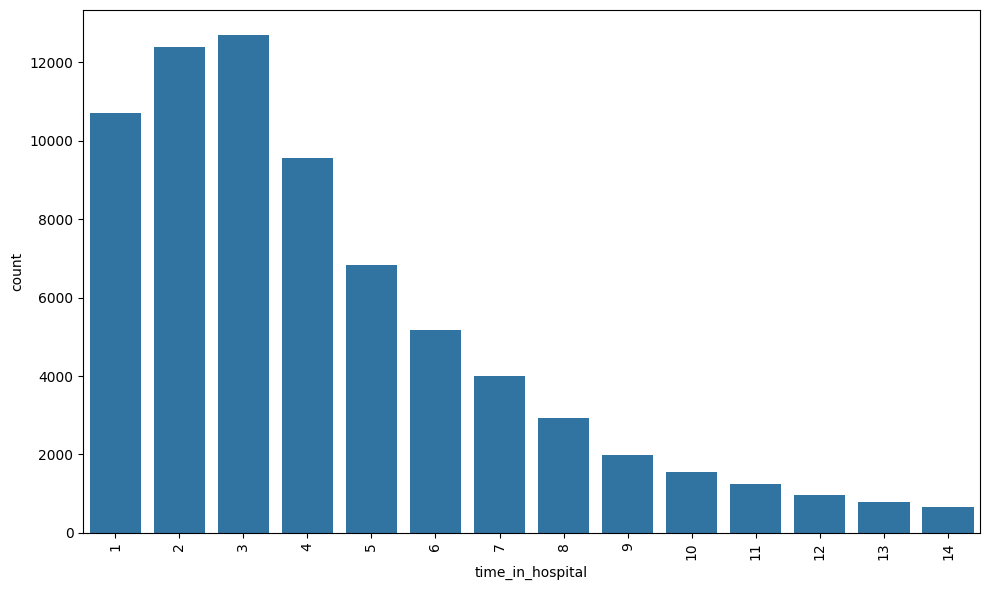


Box Plot


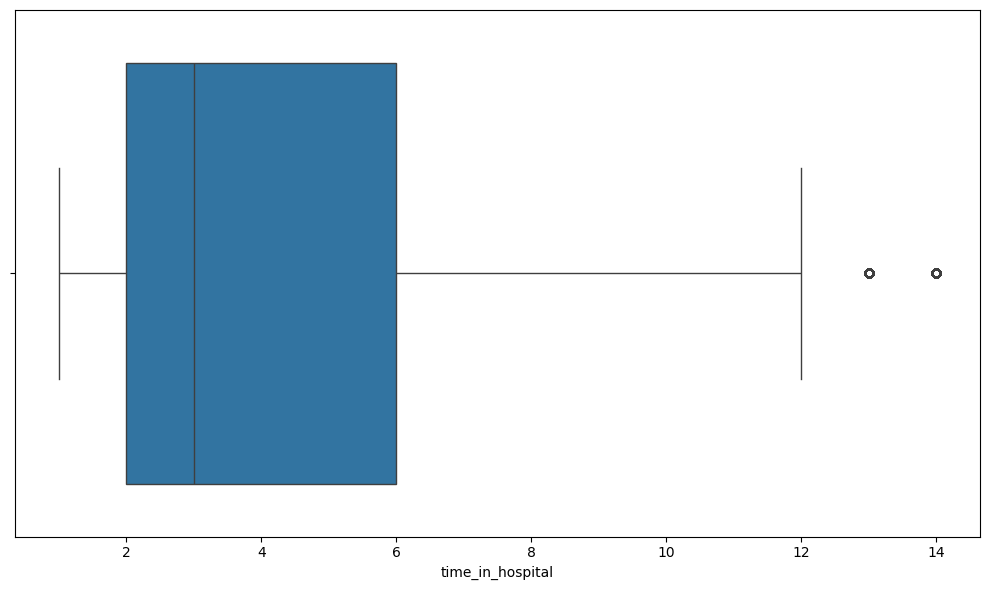


Histogram


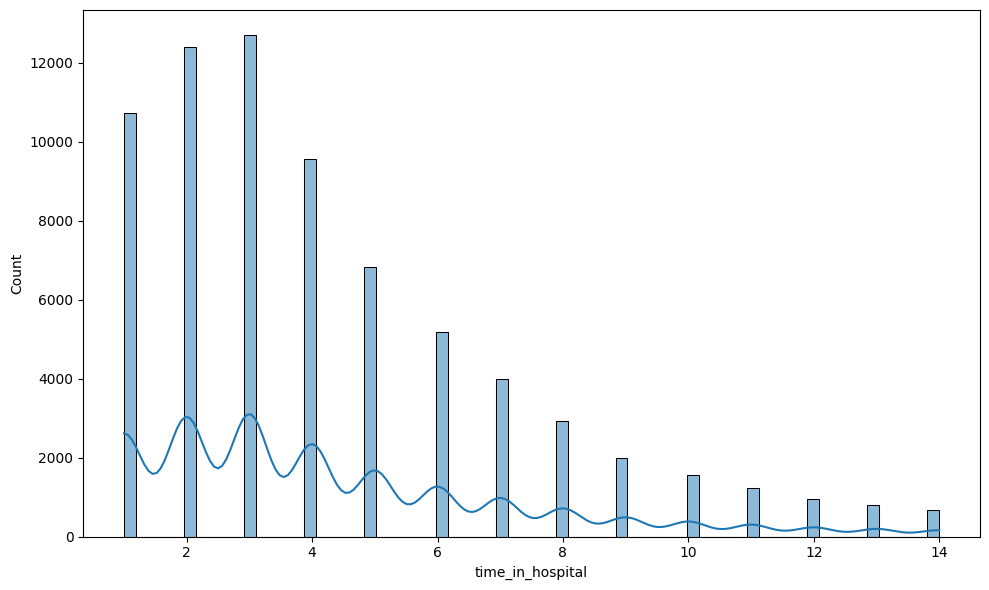

Skewness: 1.1714093968117343
Kurtosis: 0.9744429883572336
count    71518.00000
mean         4.28913
std          2.94921
min          1.00000
25%          2.00000
50%          3.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64



num_lab_procedures

Count Plot


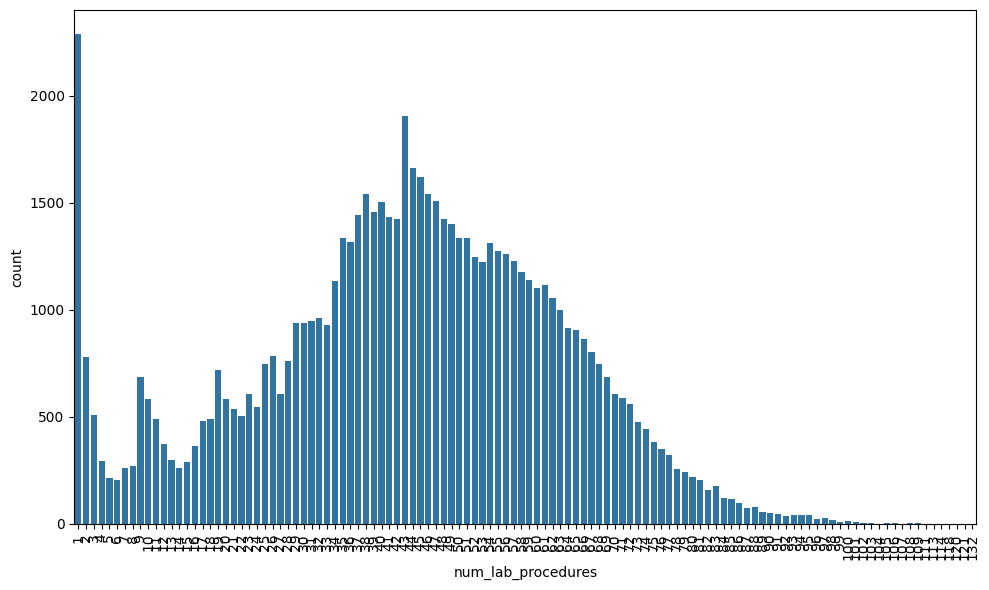


Box Plot


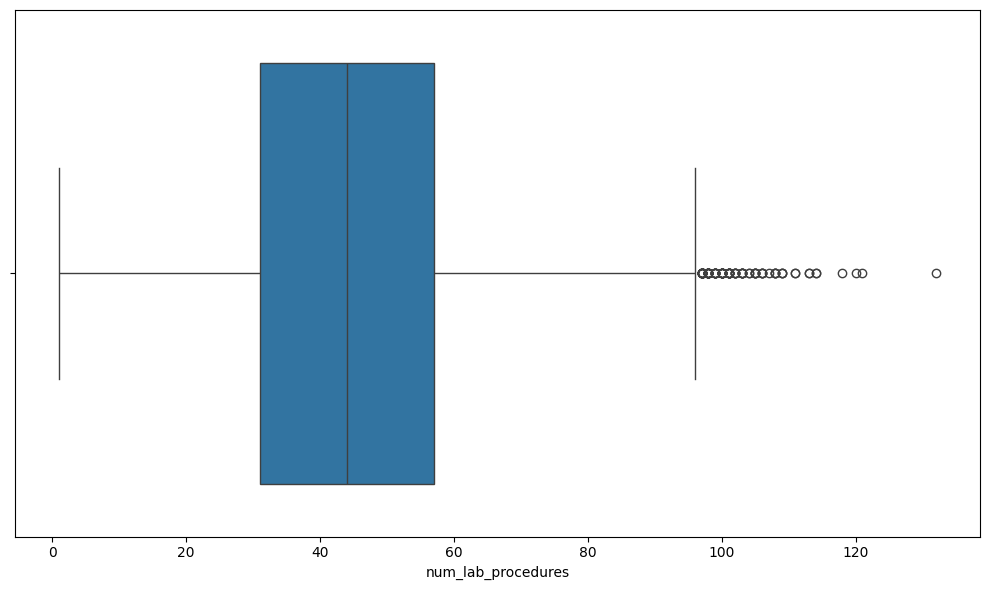


Histogram


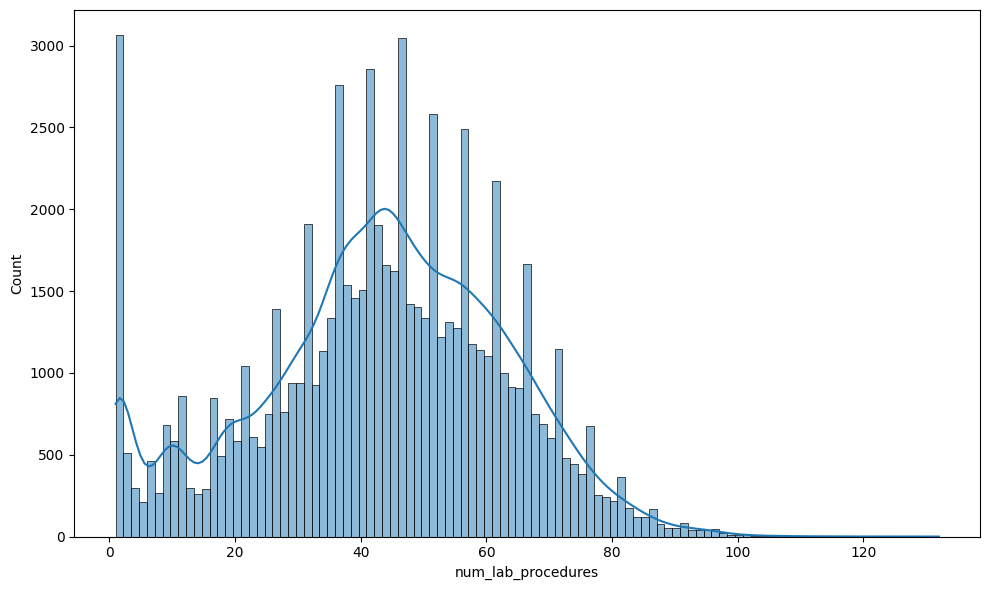

Skewness: -0.21515537674711335
Kurtosis: -0.28994666448529705
count    71518.000000
mean        43.075478
std         19.952338
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64



num_procedures

Count Plot


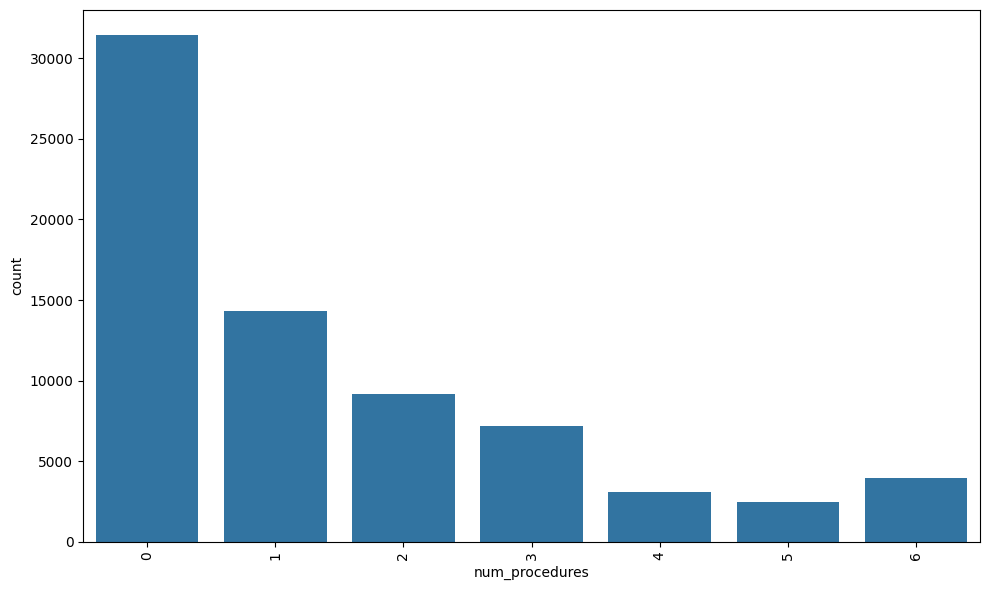


Box Plot


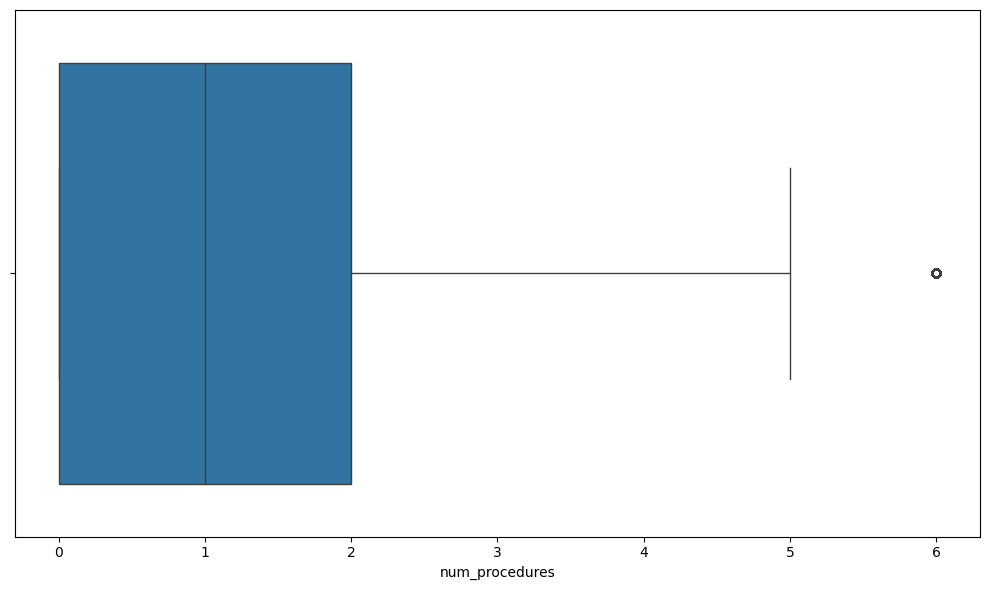


Histogram


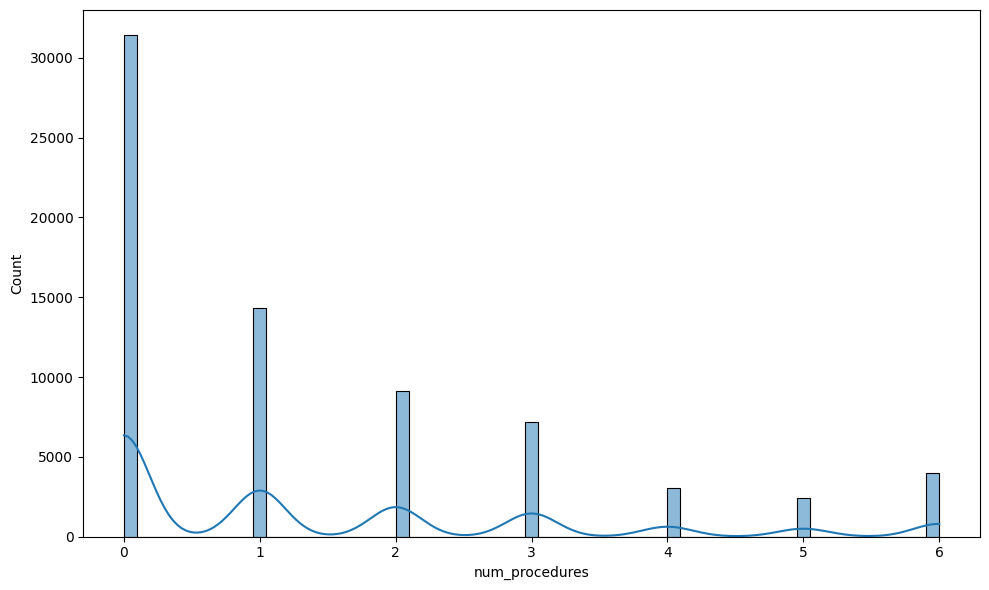

Skewness: 1.2225263488615228
Kurtosis: 0.5433096251939094
count    71518.000000
mean         1.430577
std          1.759864
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64



num_medications

Count Plot


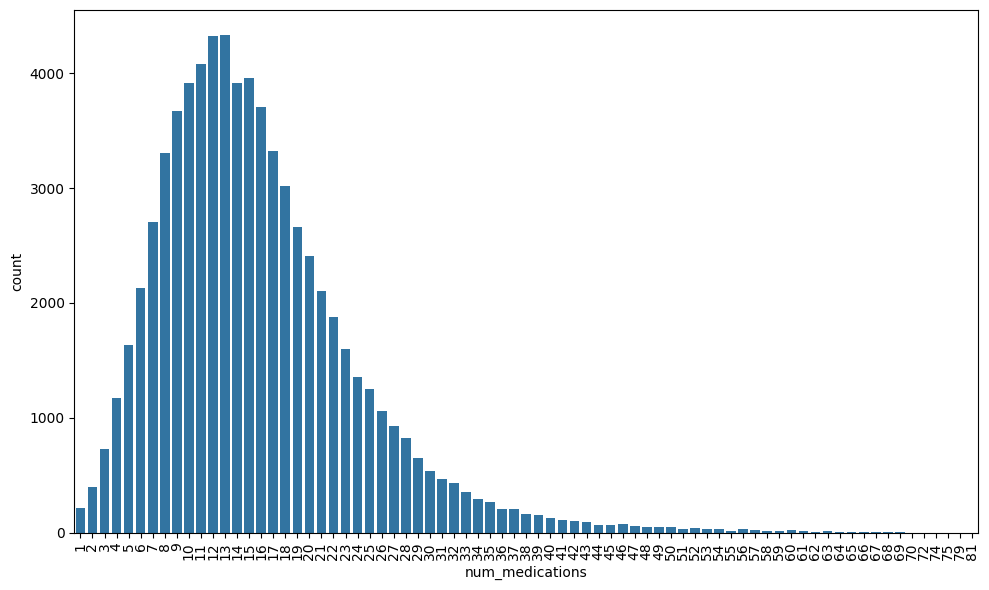


Box Plot


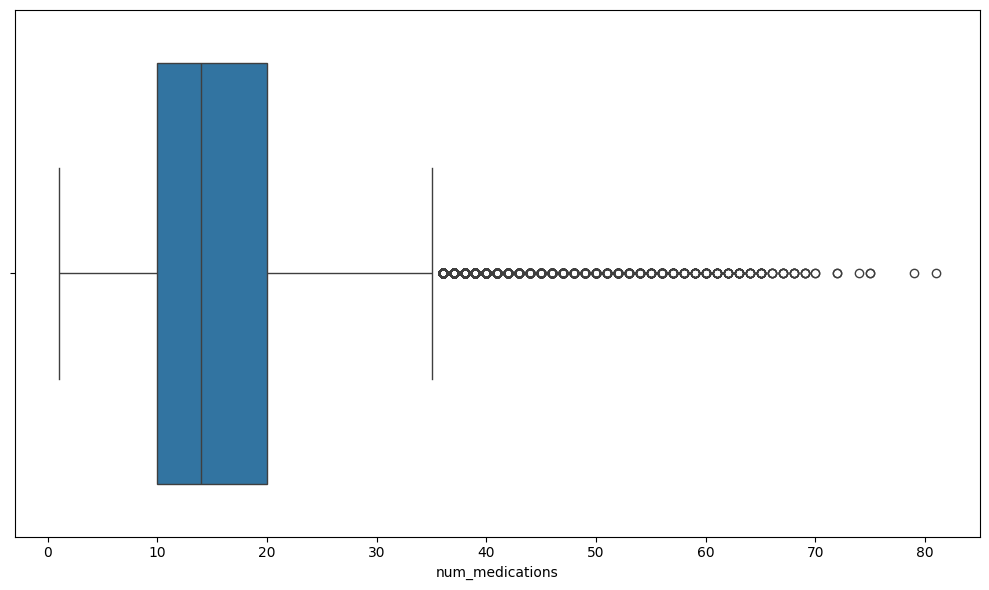


Histogram


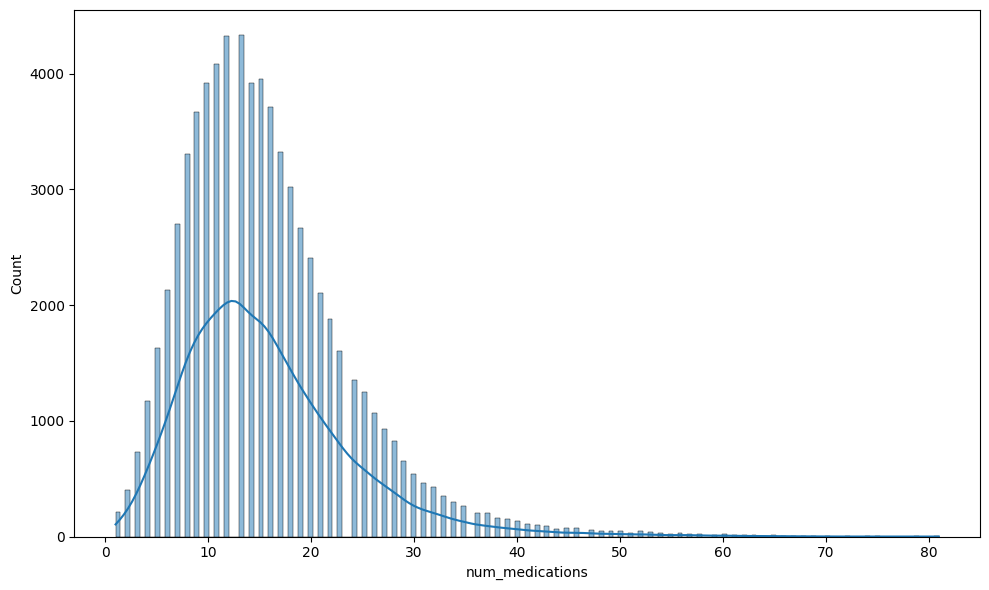

Skewness: 1.42556288646637
Kurtosis: 3.800584218457324
count    71518.000000
mean        15.705025
std          8.311163
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64



number_outpatient

Count Plot


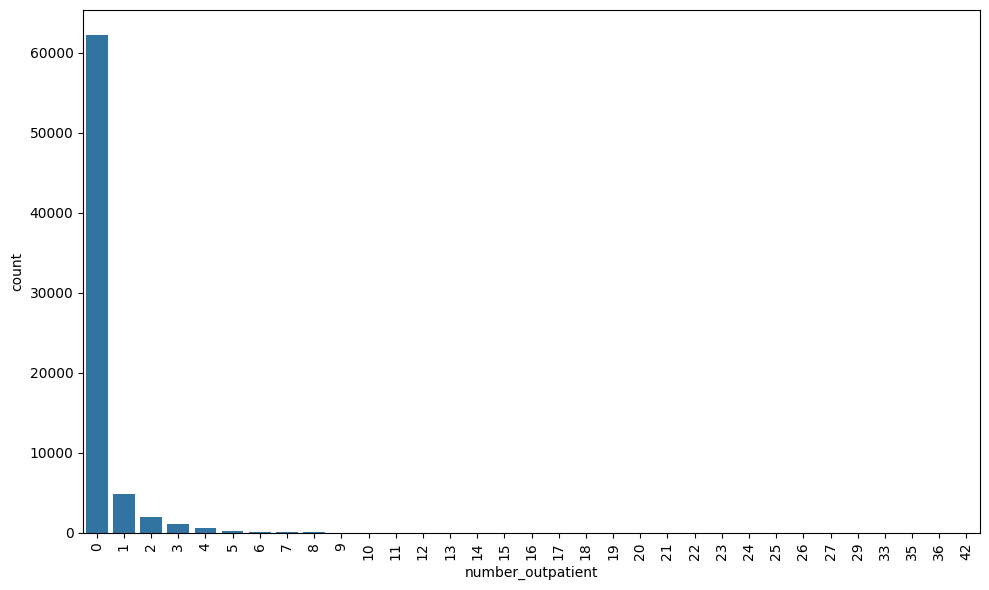


Box Plot


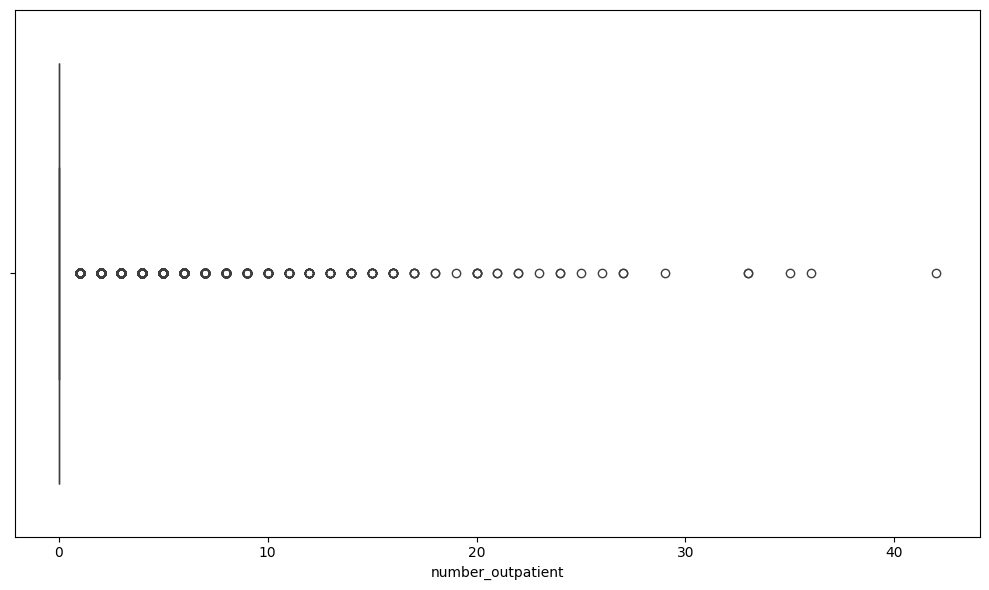


Histogram


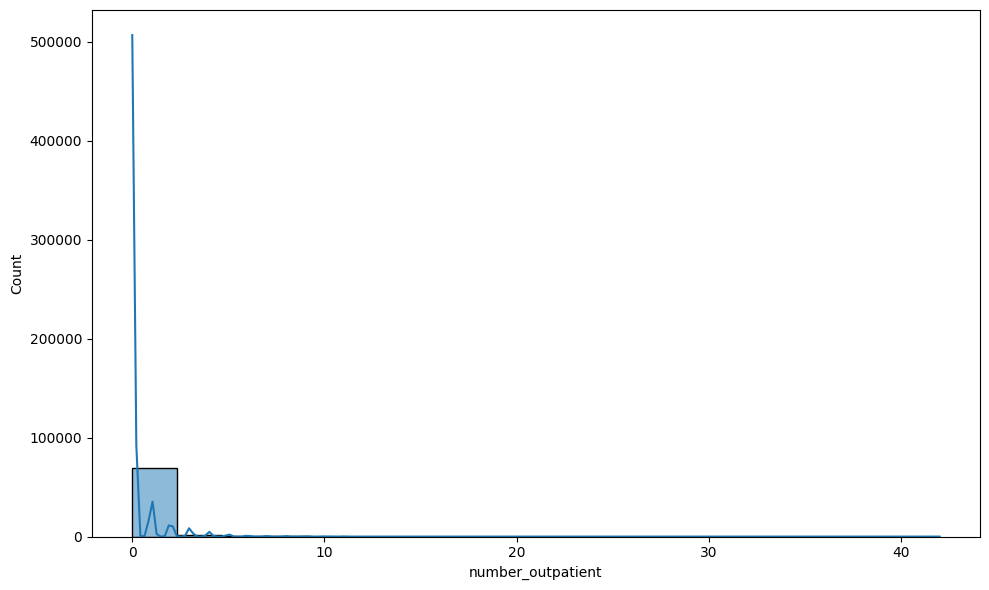

Skewness: 9.679205771493274
Kurtosis: 182.49539950338988
count    71518.000000
mean         0.280069
std          1.068957
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_outpatient, dtype: float64



number_emergency

Count Plot


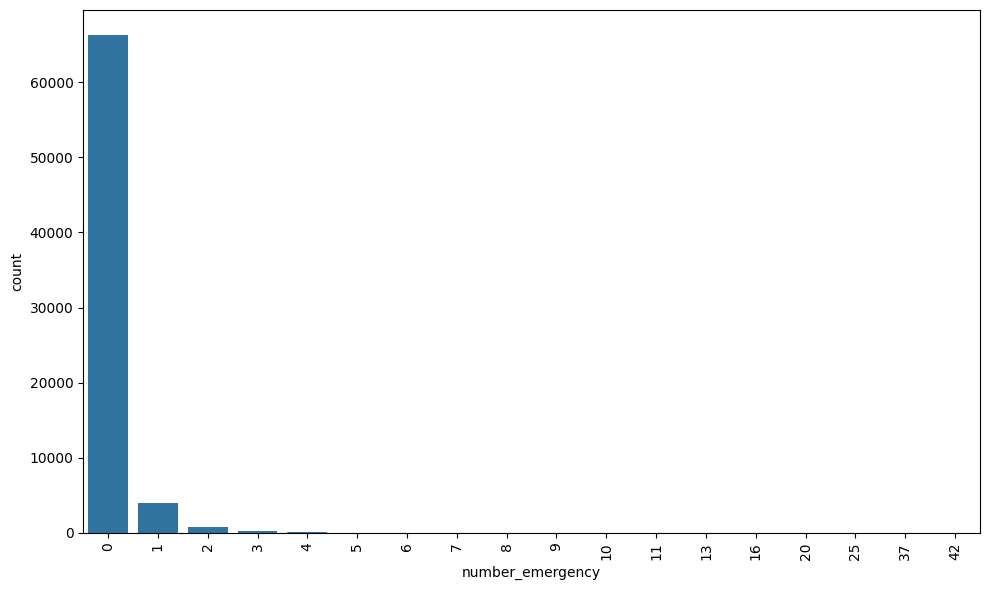


Box Plot


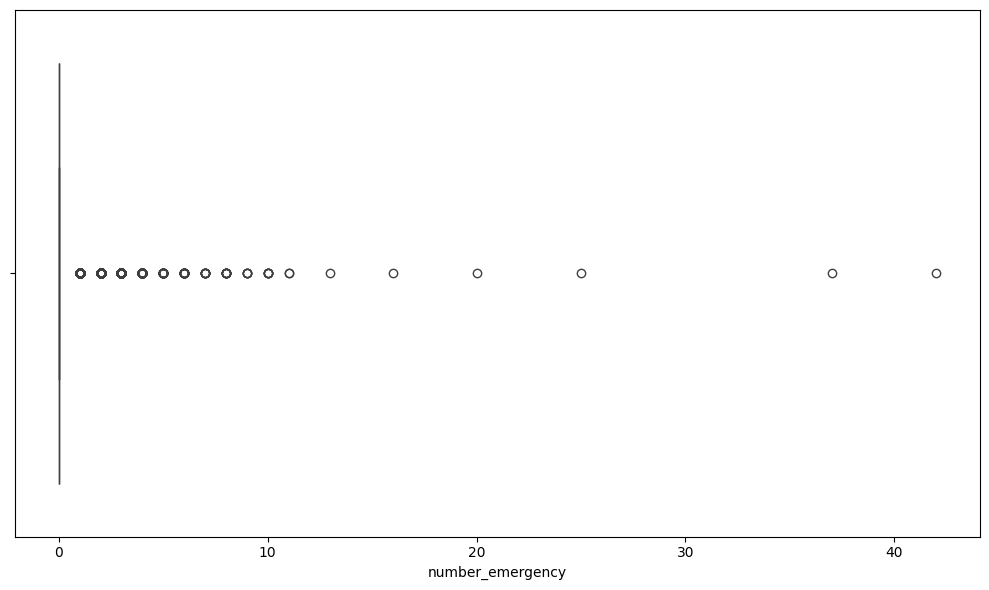


Histogram


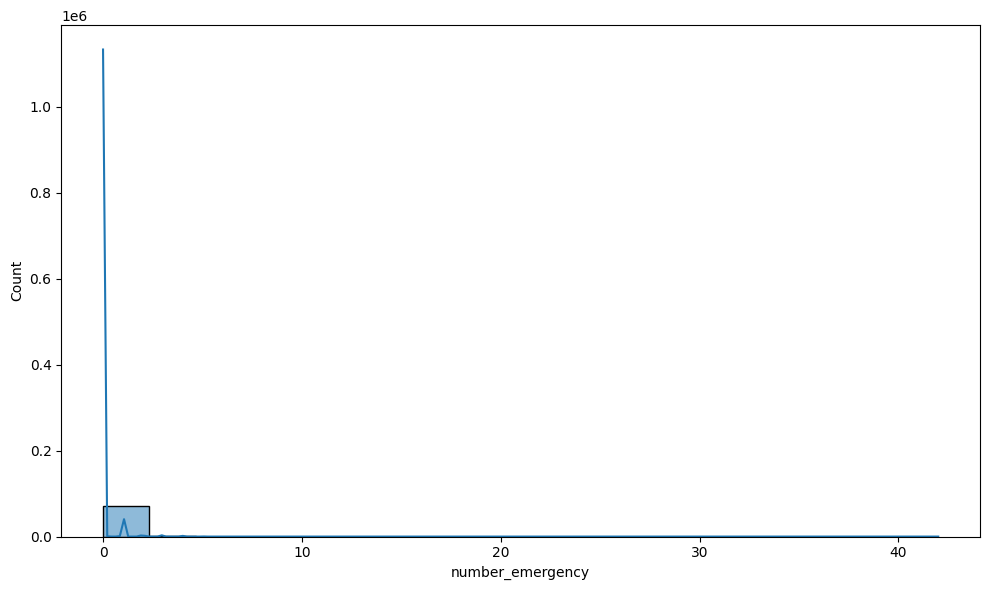

Skewness: 21.149176235228644
Kurtosis: 1208.533556306389
count    71518.000000
mean         0.103540
std          0.509187
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_emergency, dtype: float64



number_inpatient

Count Plot


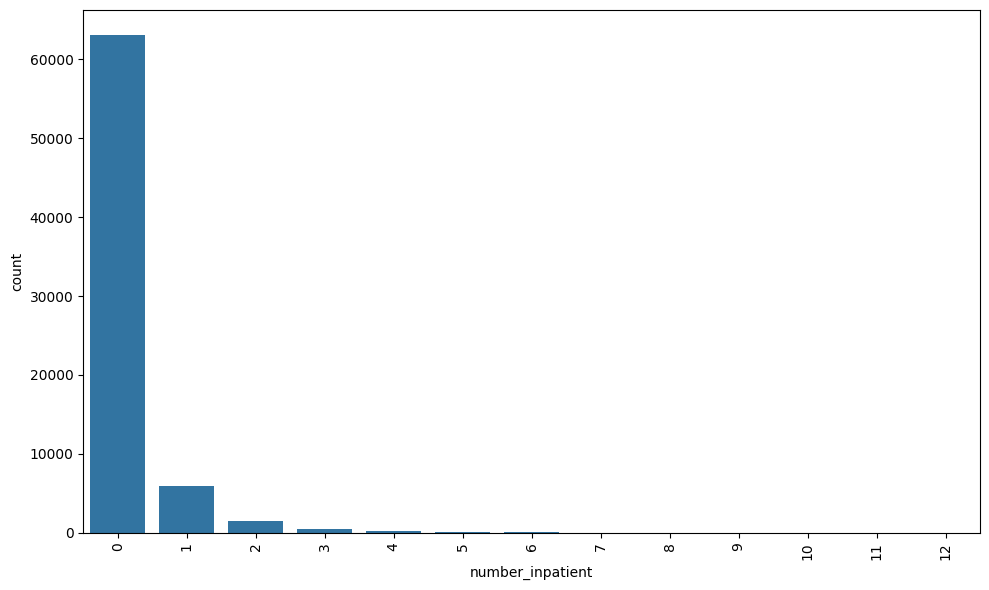


Box Plot


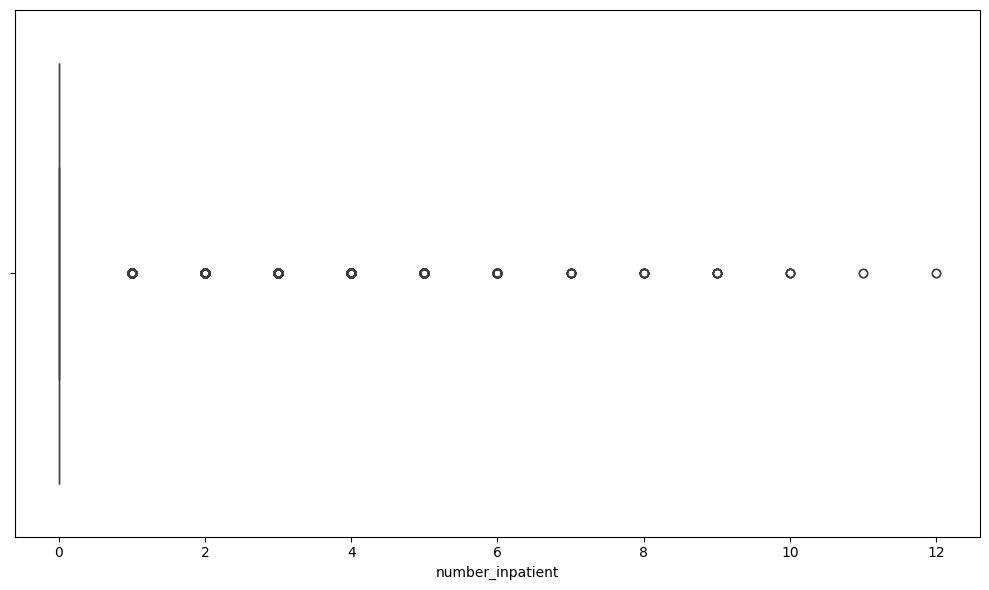


Histogram


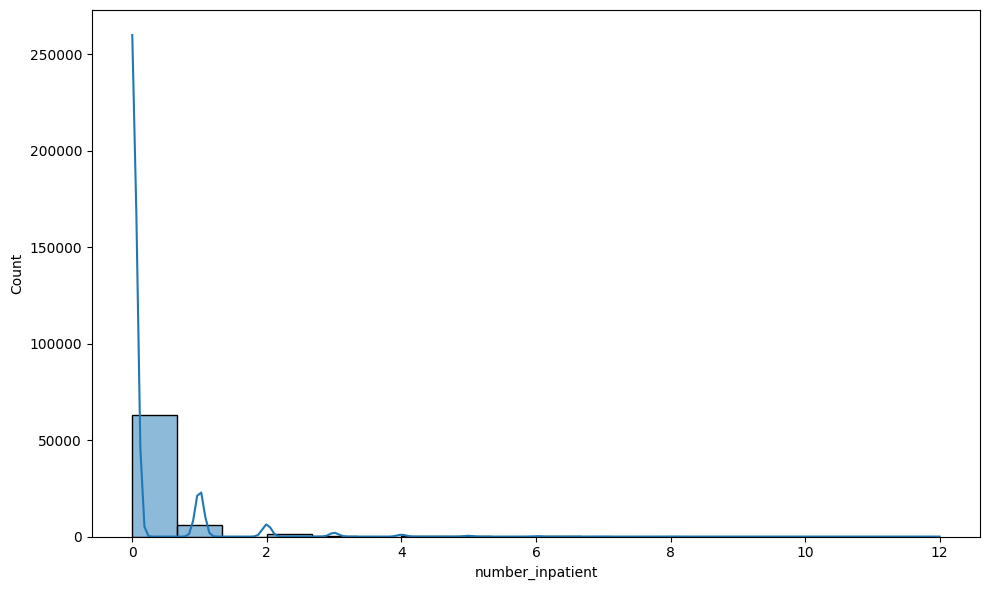

Skewness: 5.545910938294077
Kurtosis: 46.66803593621762
count    71518.000000
mean         0.177829
std          0.603790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: number_inpatient, dtype: float64



number_diagnoses

Count Plot


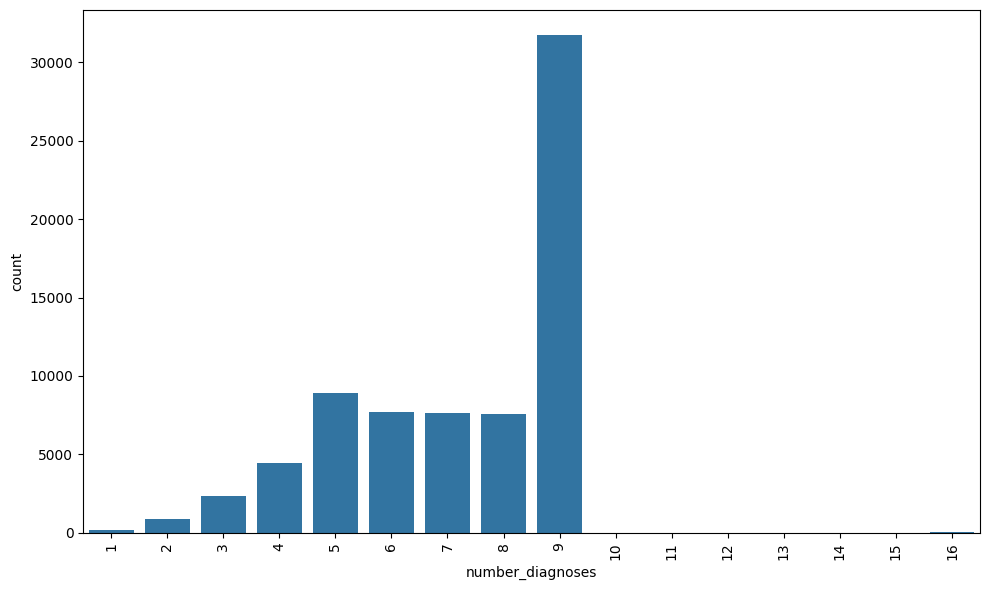


Box Plot


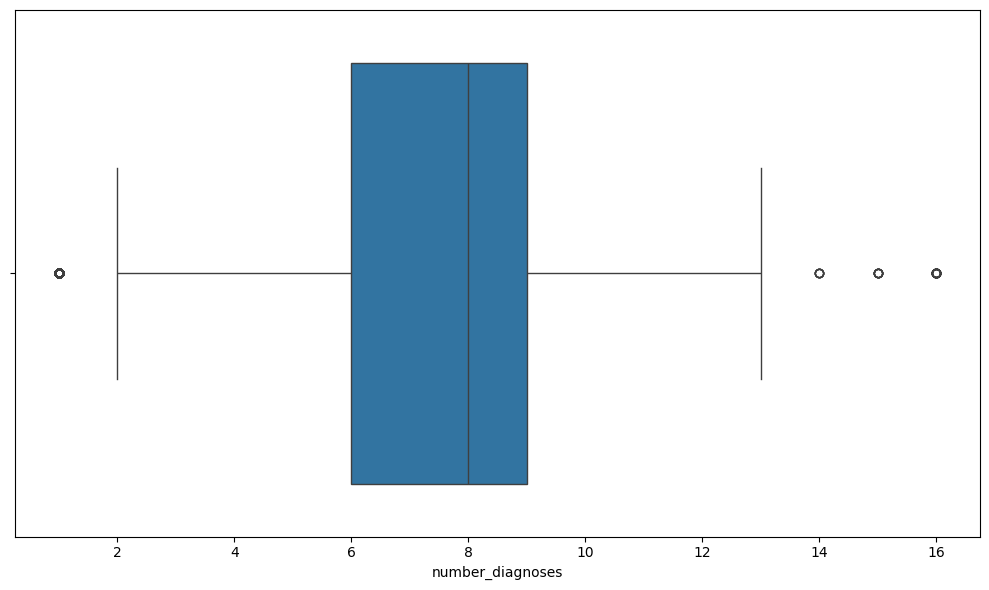


Histogram


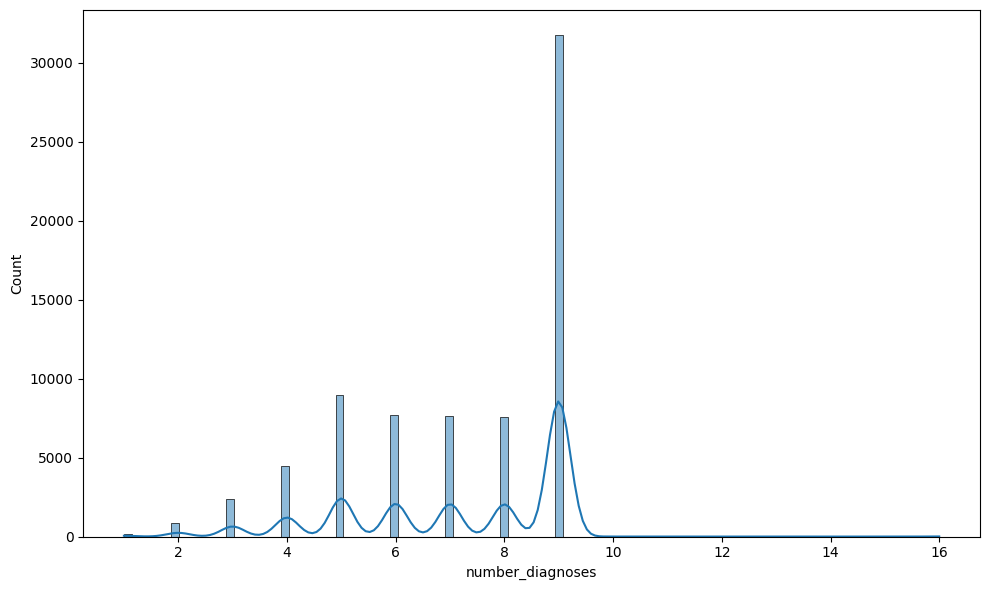

Skewness: -0.7410934716217722
Kurtosis: -0.34350822949106785
count    71518.000000
mean         7.245700
std          1.994674
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: number_diagnoses, dtype: float64



number_of_readmissions

Count Plot


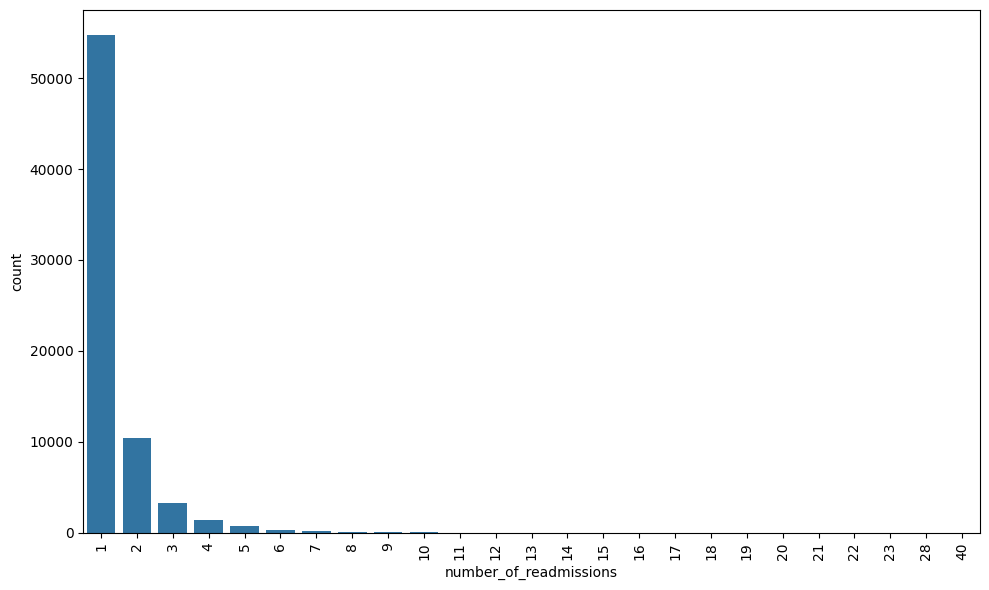


Box Plot


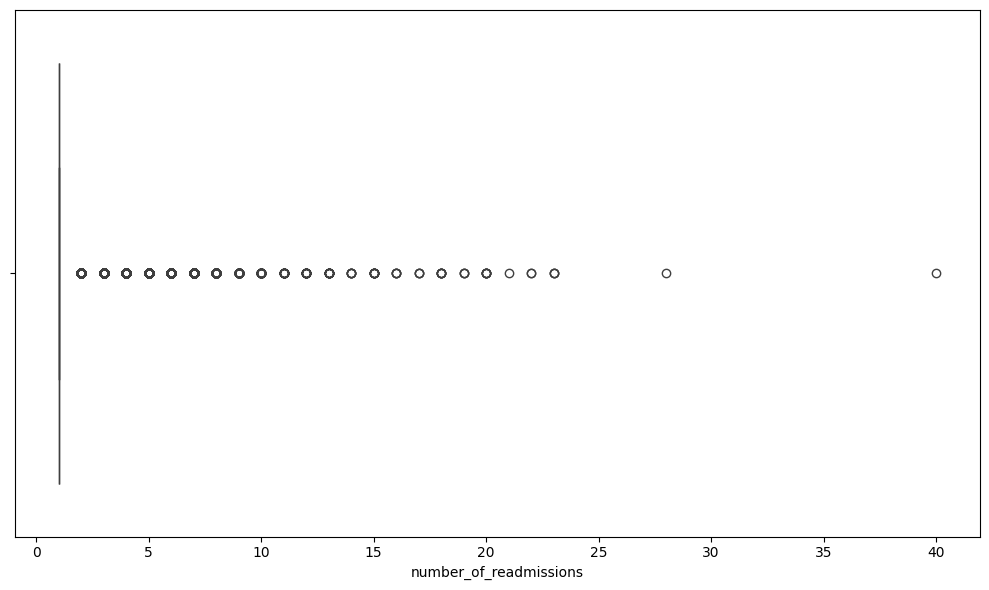


Histogram


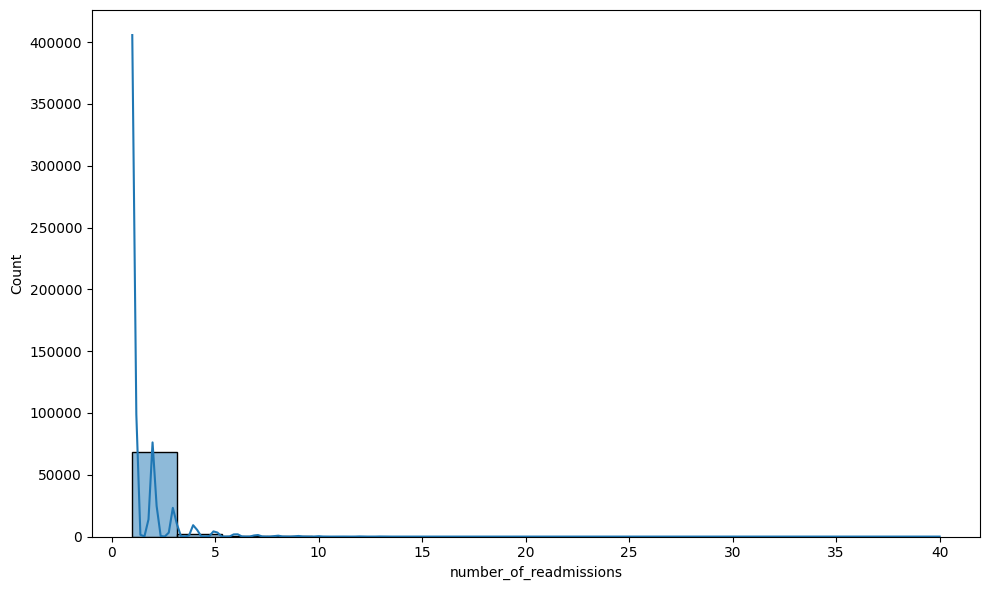

Skewness: 6.0017883801778495
Kurtosis: 75.94304895202276
count    71518.000000
mean         1.422942
std          1.090740
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         40.000000
Name: number_of_readmissions, dtype: float64




In [539]:
for i in numeric_df:
    print('\n\033[1m'+i+'\033[0m')
    print('\nCount Plot')
    #Count Plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=numeric_df, x=i)
    plt.xticks(rotation=90);
    plt.tight_layout()
    plt.show()
    #Box Plot
    print('\nBox Plot')
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=numeric_df, x=i)
    plt.tight_layout()
    plt.show()
    #Histogram
    print('\nHistogram')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=numeric_df, kde=True, x=i)
    plt.tight_layout()
    plt.show()
    # Calculate Statistics, Skewness and Kurtosis
    print('Skewness:', numeric_df[i].skew())
    print('Kurtosis:', numeric_df[i].kurt())
    print(numeric_df[i].describe())
    print('\n')
    print('=================================')


**Key Observations:**

As we can see, sum of these columns have a lot of different values.

Let us bin these columns to make patterns clearer: `num_lab_procedures`, `num_medications`

In [540]:
df['num_lab_procedures'].describe()

,num_lab_procedures
count,70431.000000
mean,42.917011
std,19.902483
min,1.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,132.000000


In [541]:
# Define bins (example boundaries – can be adjusted)
bins = [0, 20, 40, 60, 80, 100, 120, 140]
#labels = ['Very Low', 'Low', 'Medium', 'High']

#df['Fare_Bin'] = pd.cut(df['Fare'], bins=bins, labels=labels)
df['num_lab_procedures_bins'] = pd.cut(df['num_lab_procedures'], bins=bins)

<Axes: xlabel='num_lab_procedures_bins', ylabel='count'>

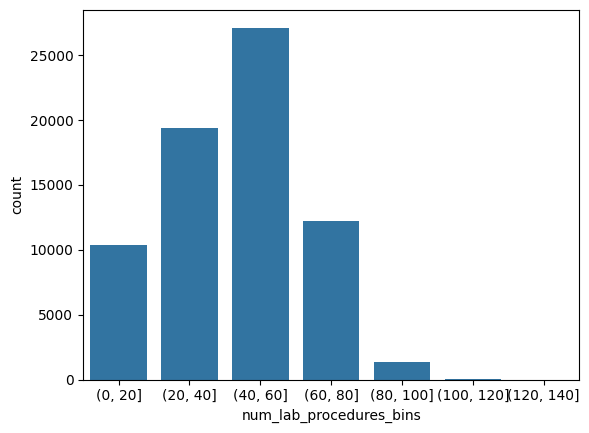

In [542]:
sns.countplot(data=df, x='num_lab_procedures_bins')

##### Drug Categorical Columns

In [563]:
print("Number of unique values for each drug categorical column:\n")
for col in drug_df.columns:
    print(col, drug_df[col].nunique())

Number of unique values for each drug categorical column:

metformin 4
repaglinide 4
glimepiride 4
glipizide 4
glyburide 4
pioglitazone 4
rosiglitazone 4
insulin 4



metformin

Count Plot


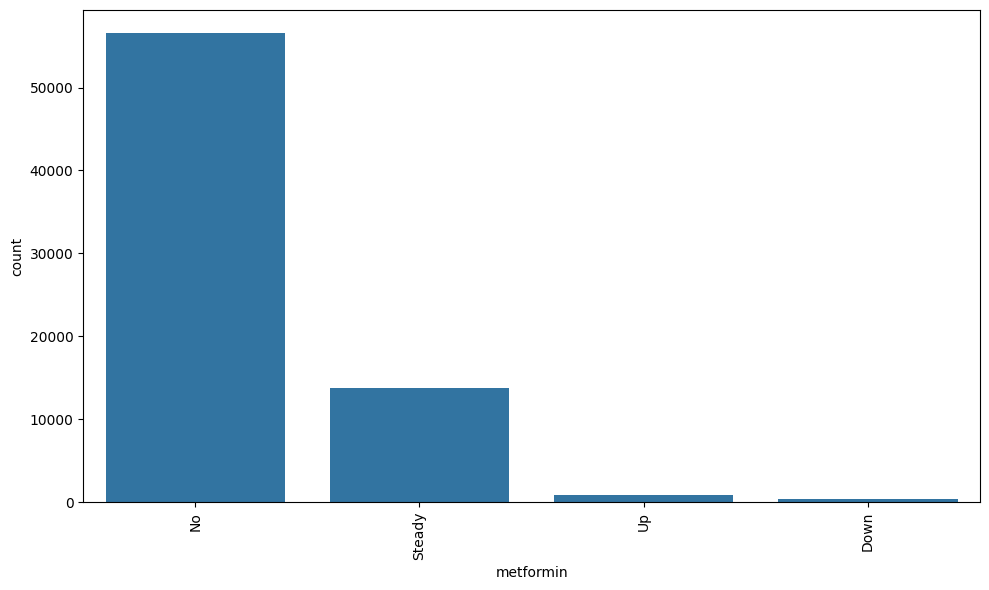


Pie Chart


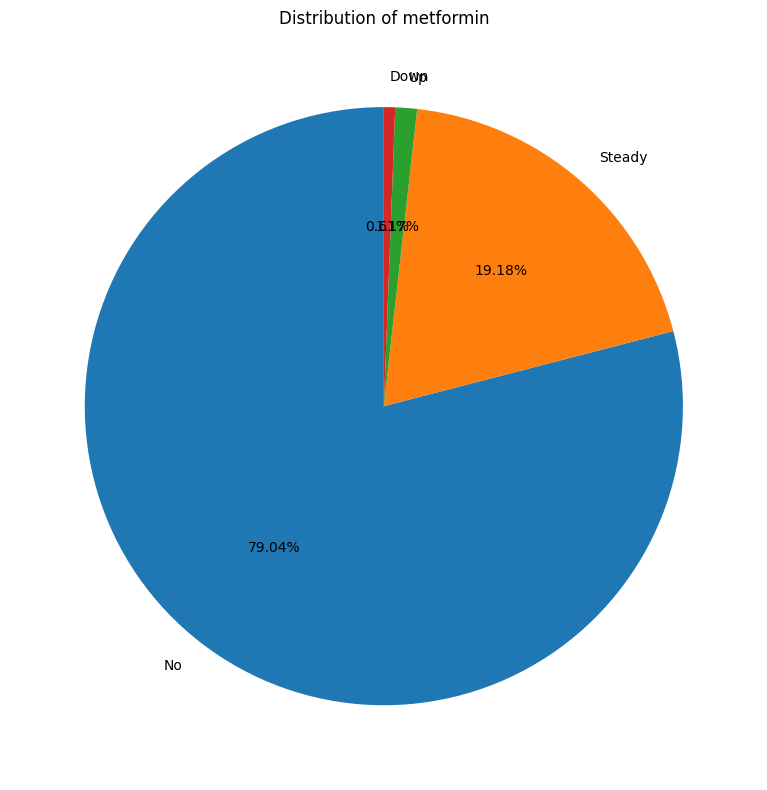




repaglinide

Count Plot


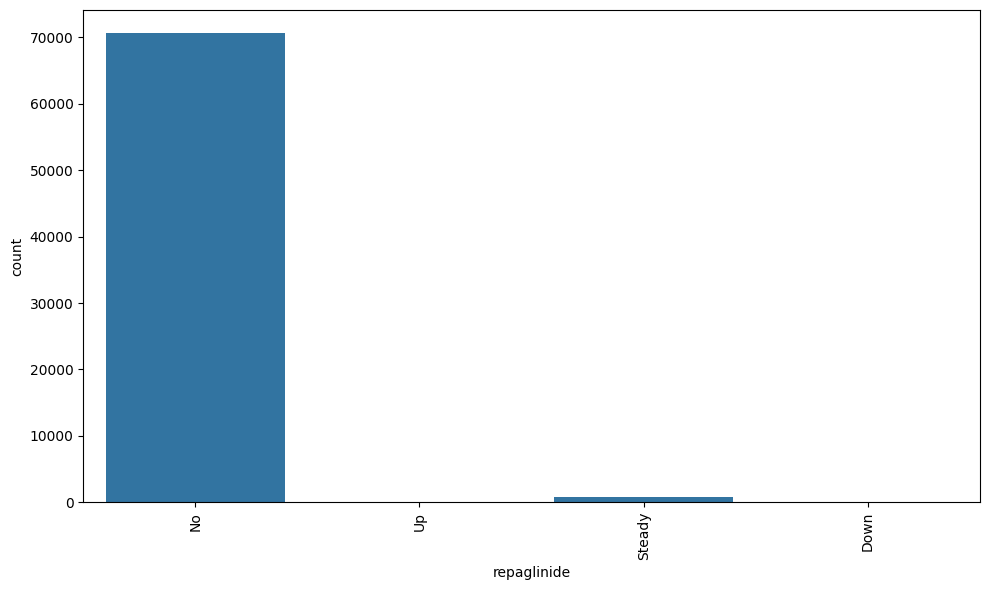


Pie Chart


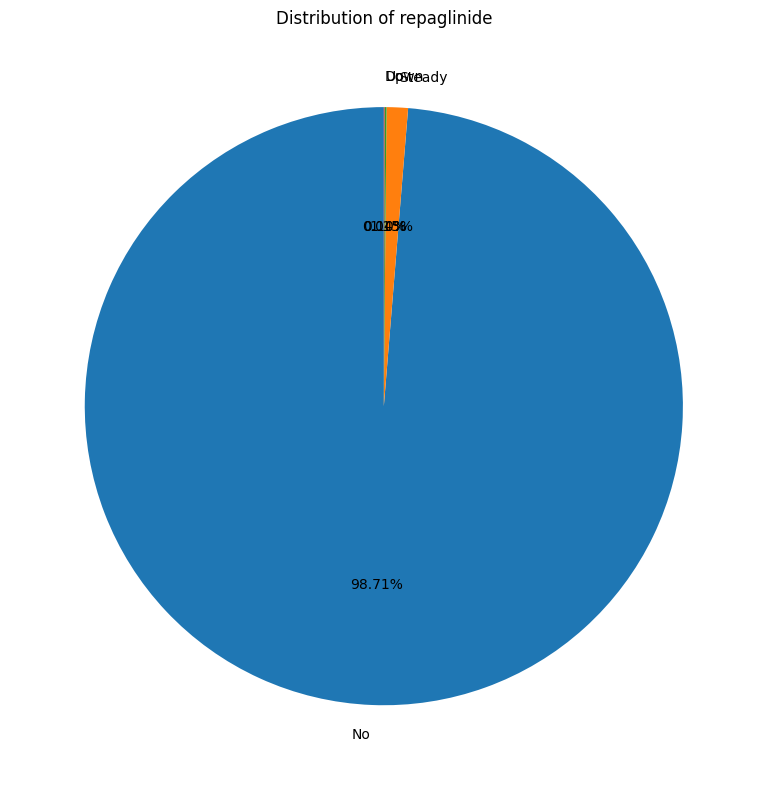




glimepiride

Count Plot


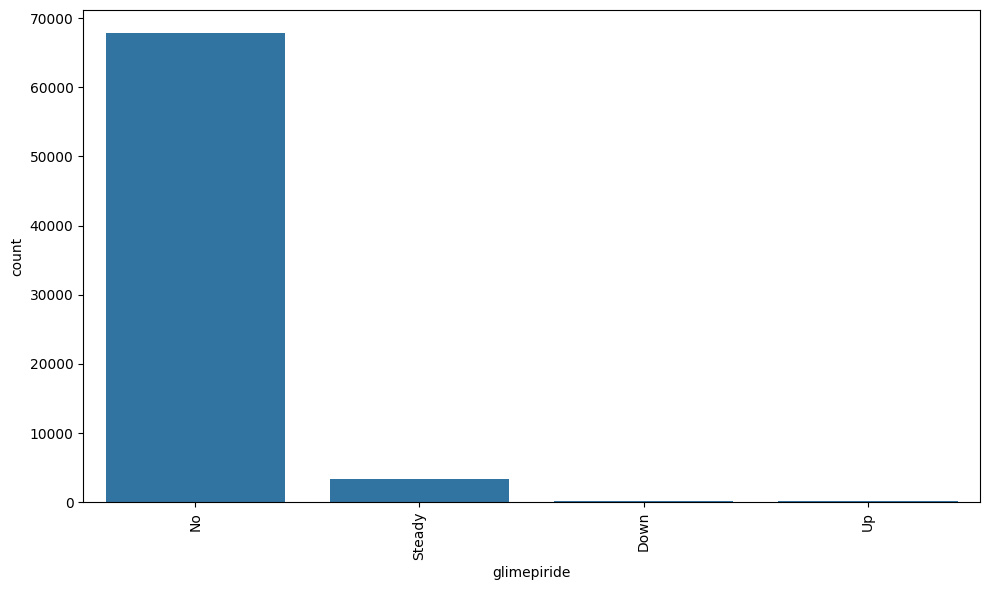


Pie Chart


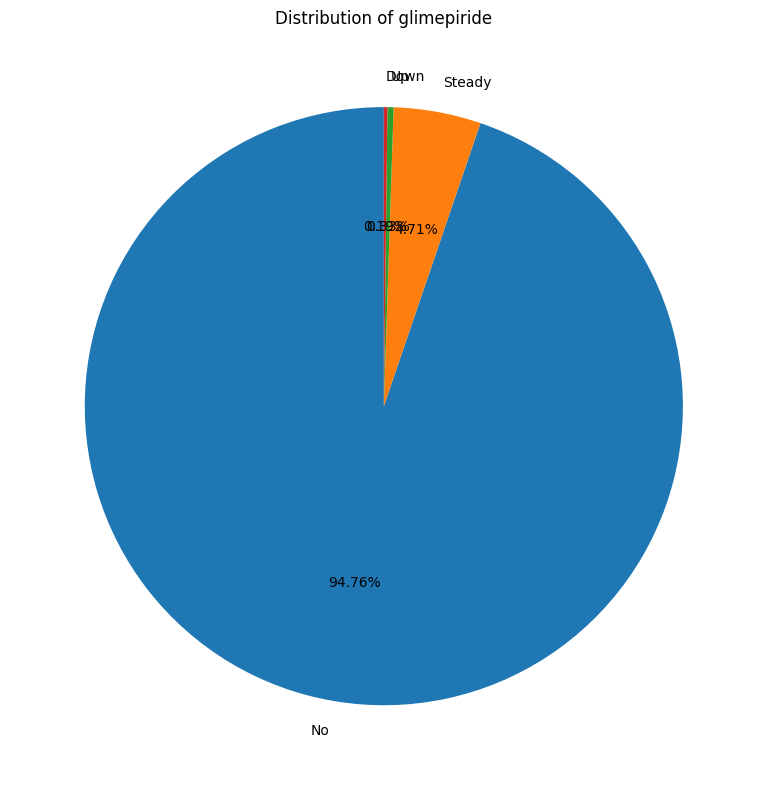




glipizide

Count Plot


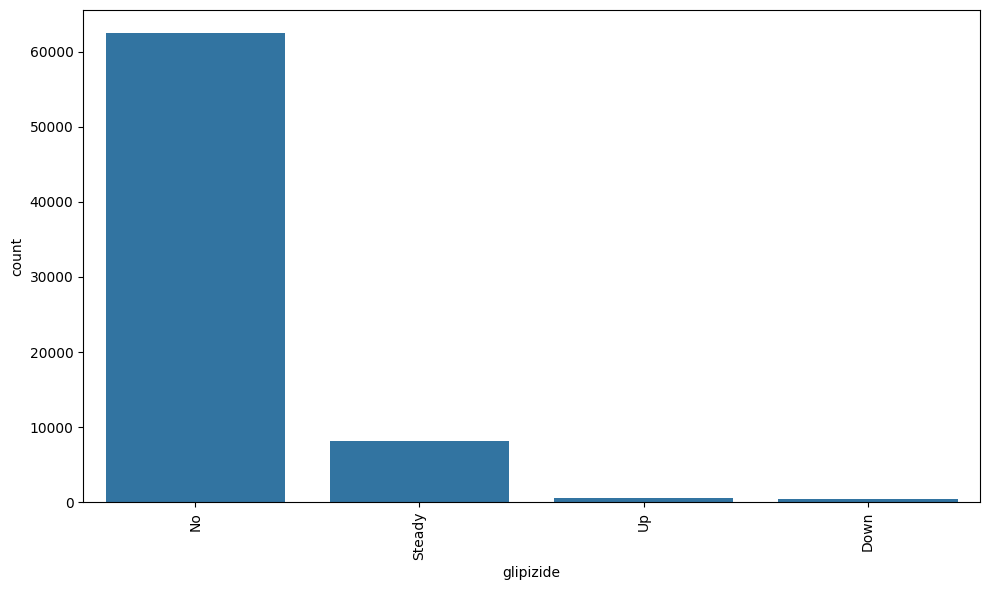


Pie Chart


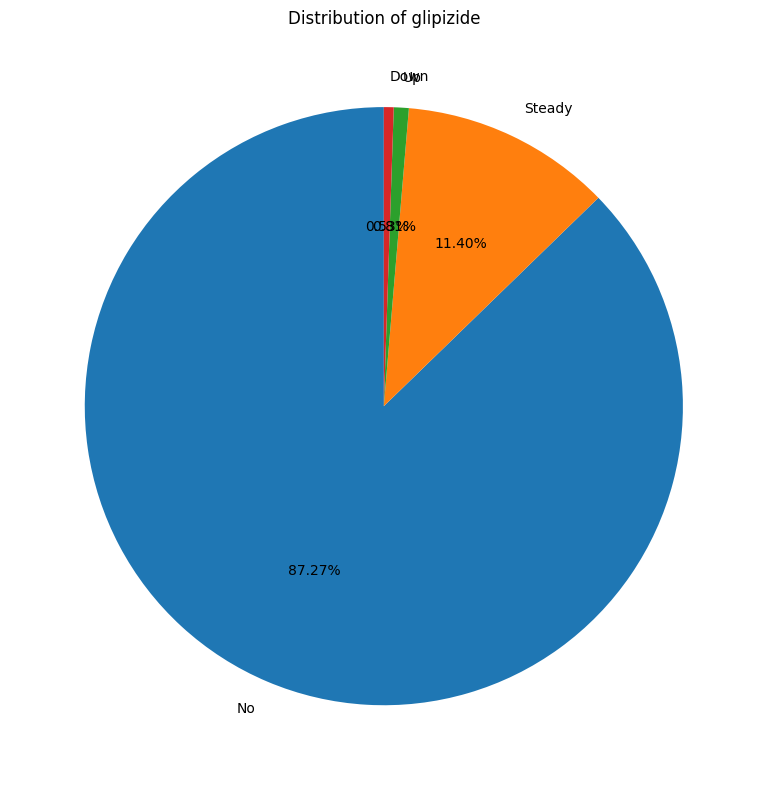




glyburide

Count Plot


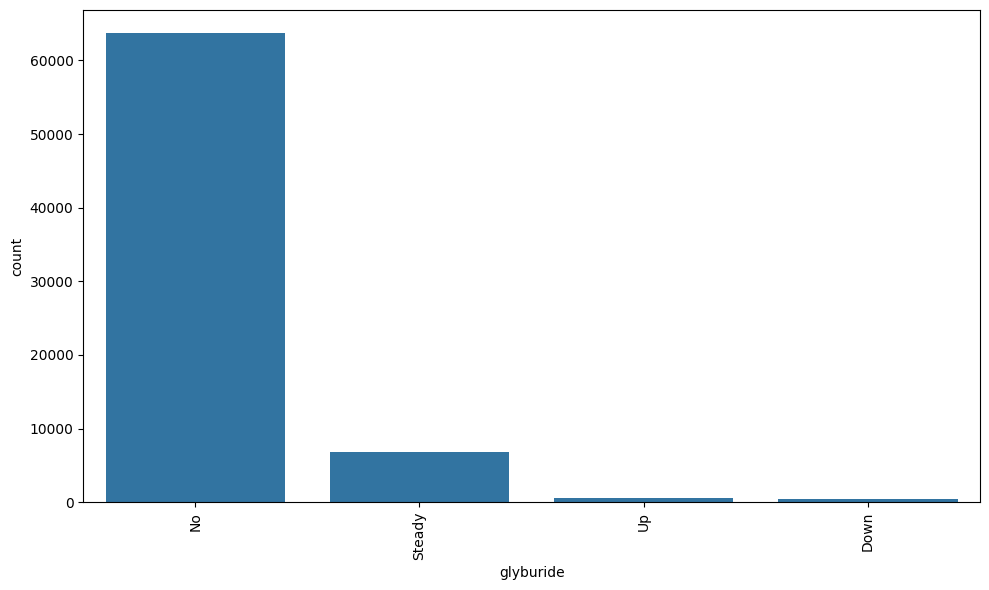


Pie Chart


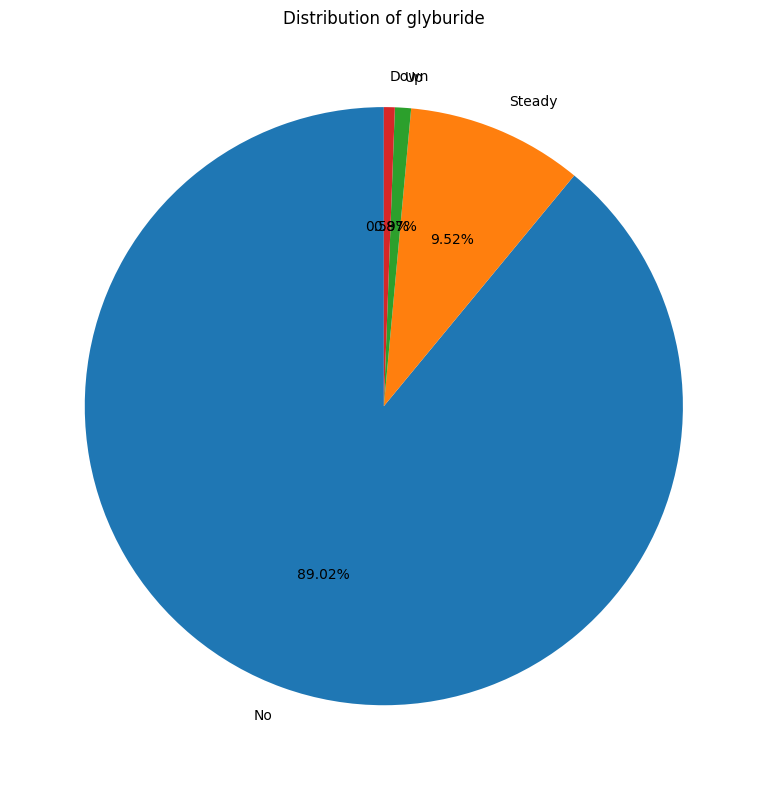




pioglitazone

Count Plot


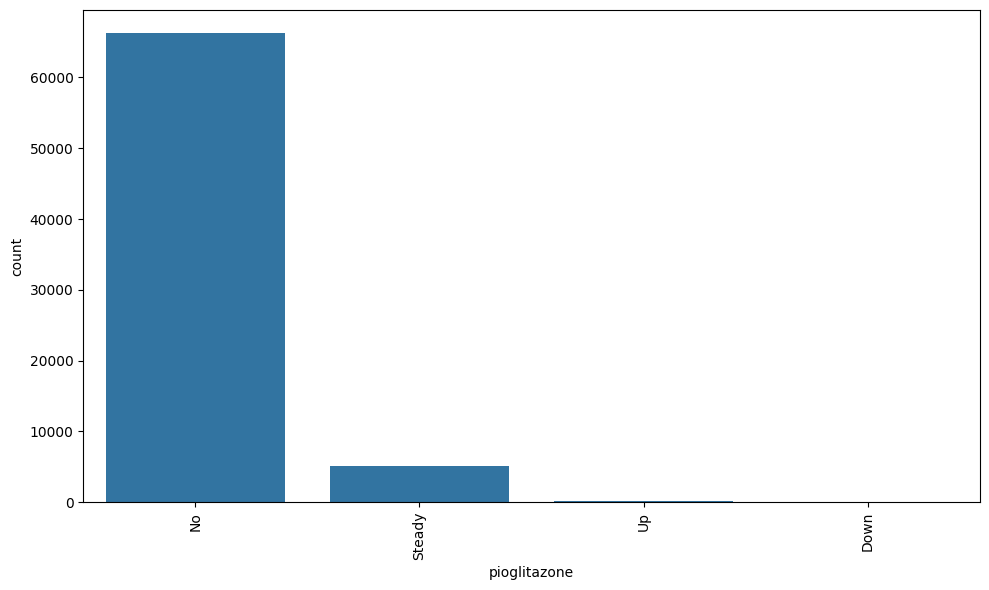


Pie Chart


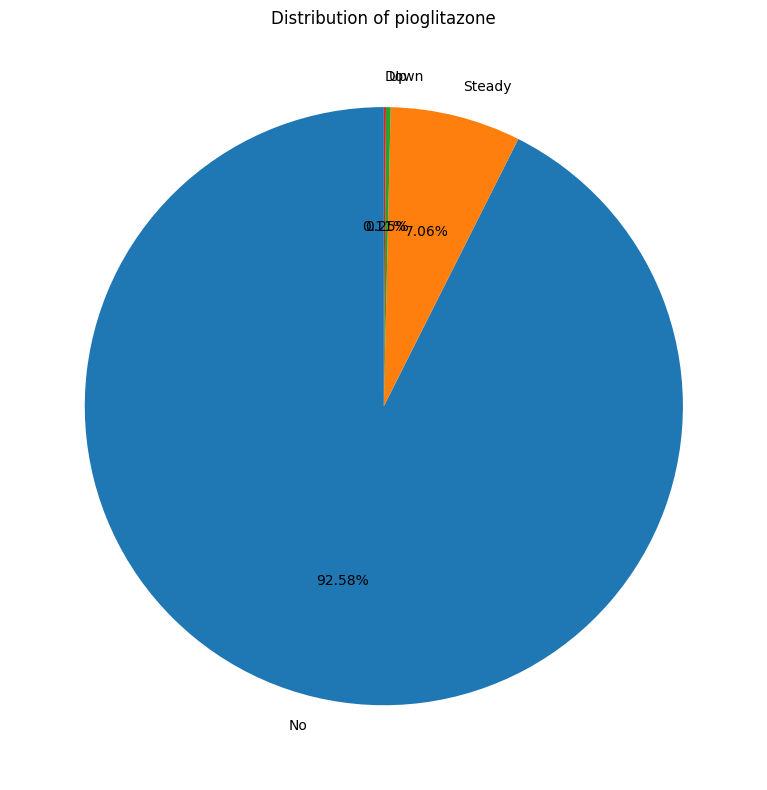




rosiglitazone

Count Plot


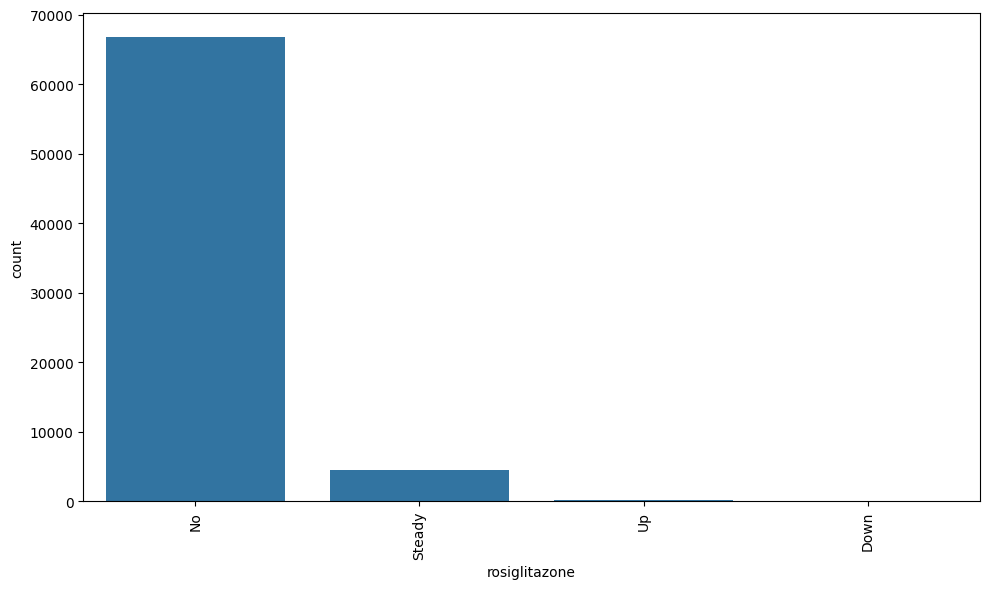


Pie Chart


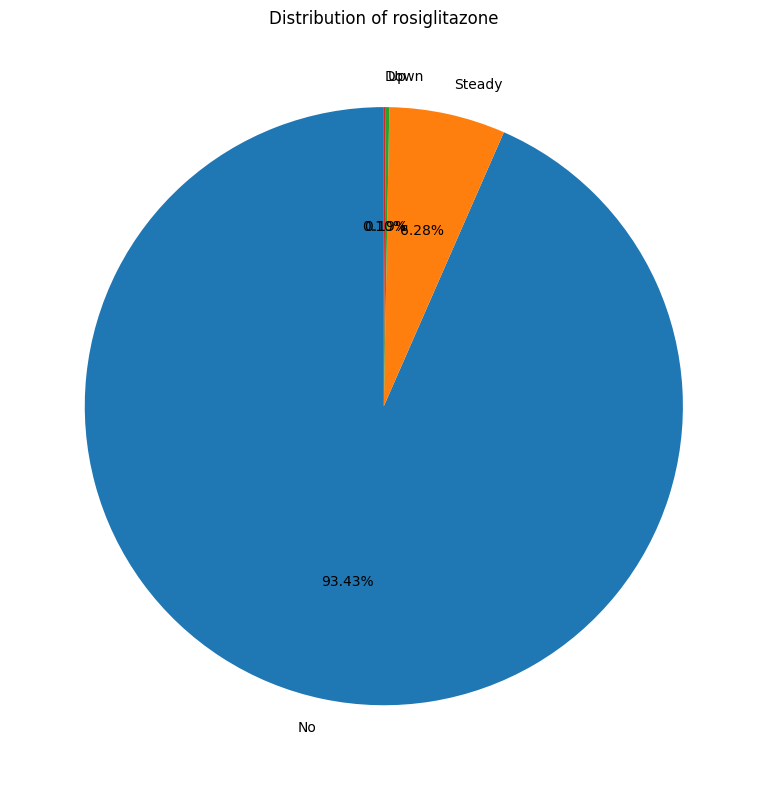




insulin

Count Plot


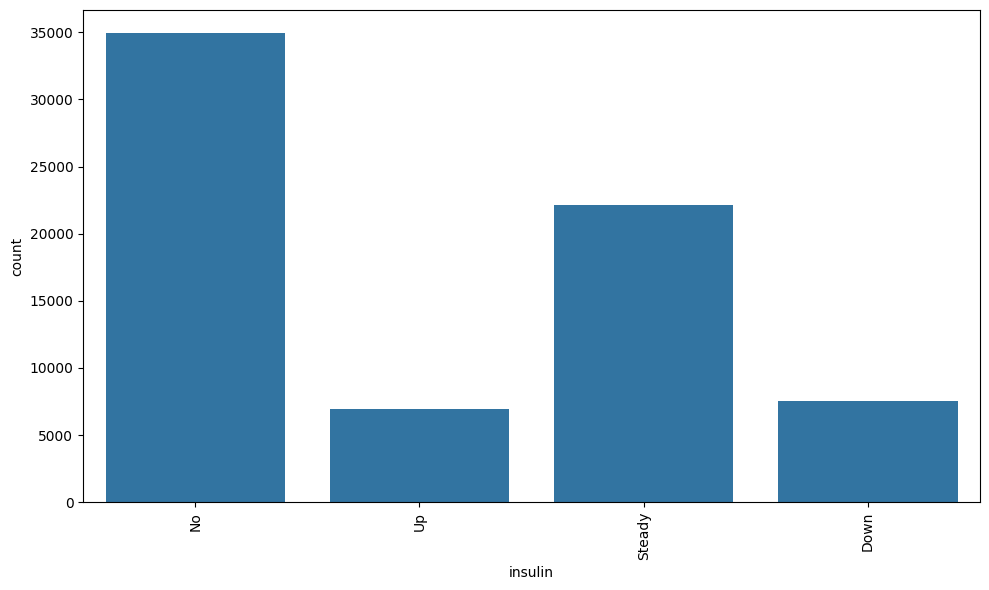


Pie Chart


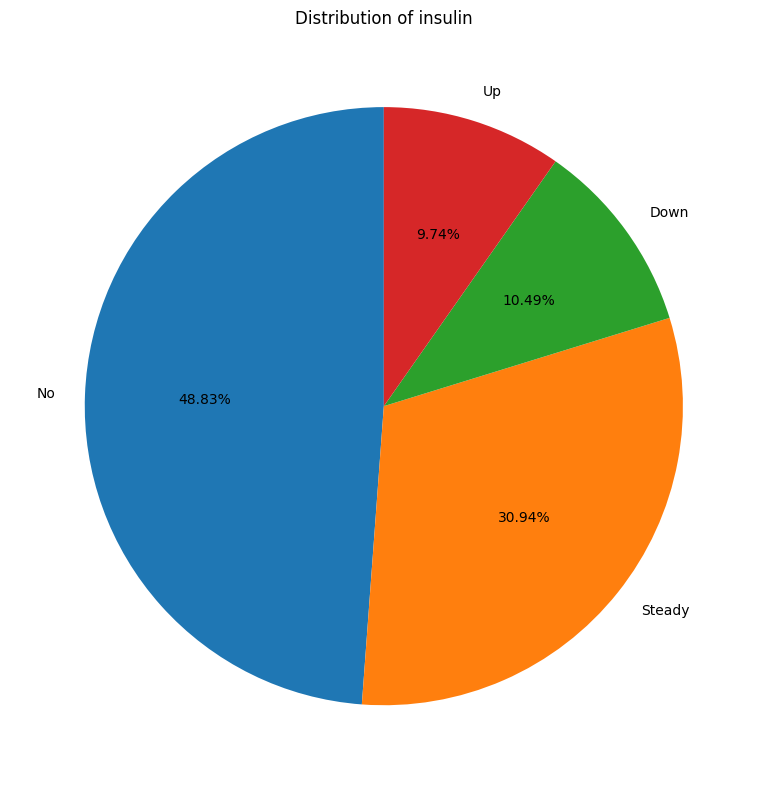

In [544]:
for i in drug_df:
    print('\n\033[1m'+i+'\033[0m')
    print('\nCount Plot')
    plt.figure(figsize=(10, 6))
    sns.countplot(data=drug_df, x=i)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    print('\nPie Chart')
    plt.figure(figsize=(8, 8))
    drug_df[i].value_counts().plot.pie(autopct='%1.2f%%', startangle=90)
    plt.ylabel('') # Hide the default ylabel
    plt.title(f'Distribution of {i}')
    #plt.legend(drug_df[i], loc="center right", bbox_to_anchor=(1.2, 0.5))
    #plt.legend(loc="center right", bbox_to_anchor=(2.2, 0.5))
    plt.tight_layout()
    plt.show()

    print('\n')
    print('=================================')

**Key Observations:**

<Axes: xlabel='readmitted', ylabel='count'>

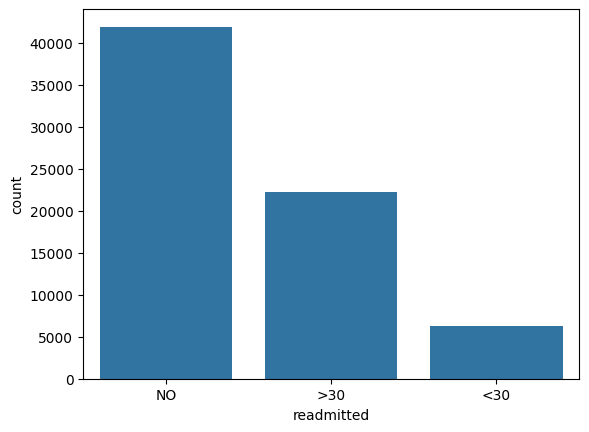

In [545]:
# plot on readmitted label -
sns.countplot(data=df, x='readmitted') # frequency - count

In [546]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
101754,False
101755,False
101756,False
101758,False


<Axes: xlabel='age', ylabel='count'>

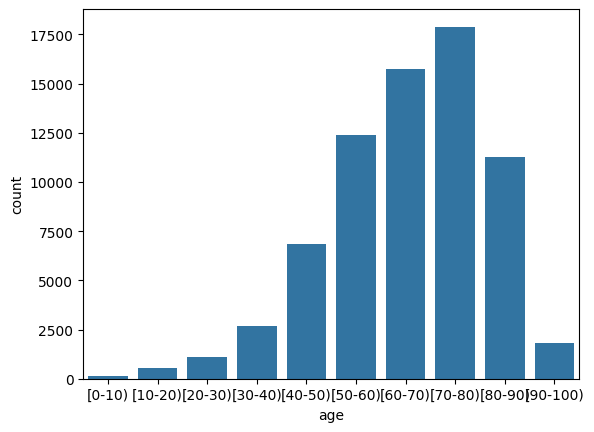

In [547]:
# countplot of Age group
sns.countplot(data=df, x='age')

##### Non-Drug Categorical Columns

In [562]:
print("Number of unique values for each non-drug categorical column:\n")
for col in non_drug_df.columns:
    print(col, non_drug_df[col].nunique())

Number of unique values for each non-drug column:

race 6
gender 2
age 10
medical_specialty 71
diag_1 18
diag_2 18
diag_3 18
change 2
diabetesMed 2
readmitted 3
admission_type_desc 8
discharge_desc 23
admission_source_desc 17
readmitted_binary 2



race

Count Plot


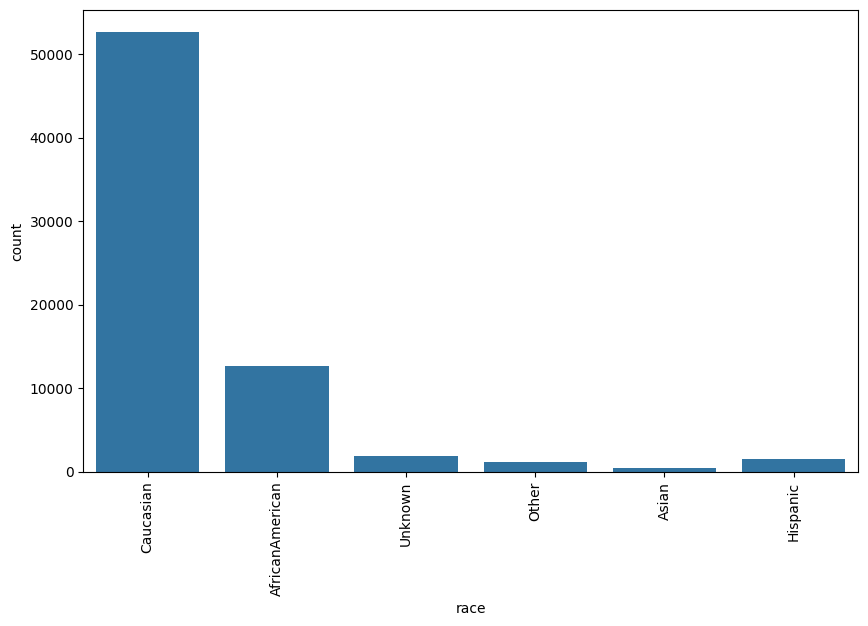


Pie Chart


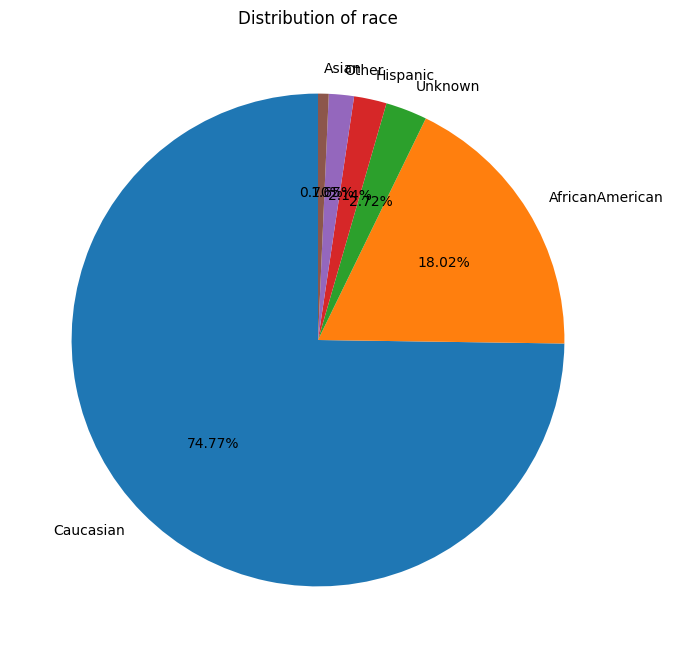




gender

Count Plot


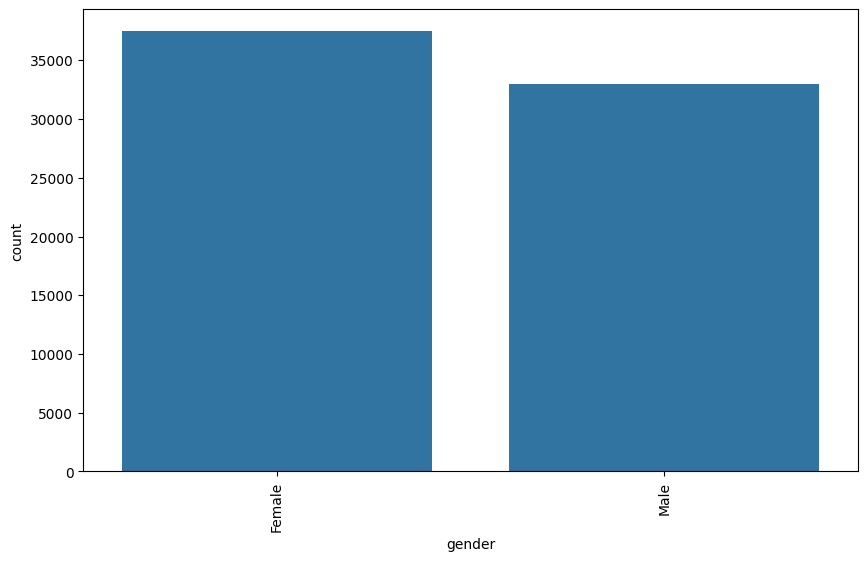


Pie Chart


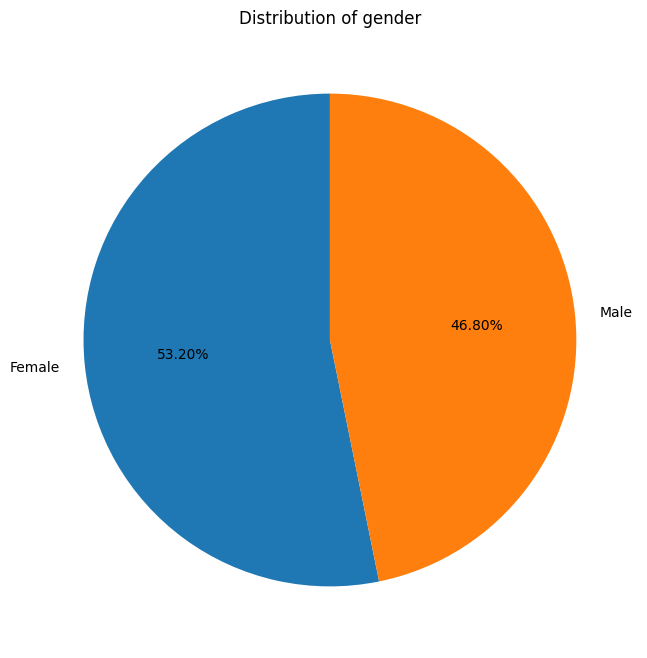




age

Count Plot


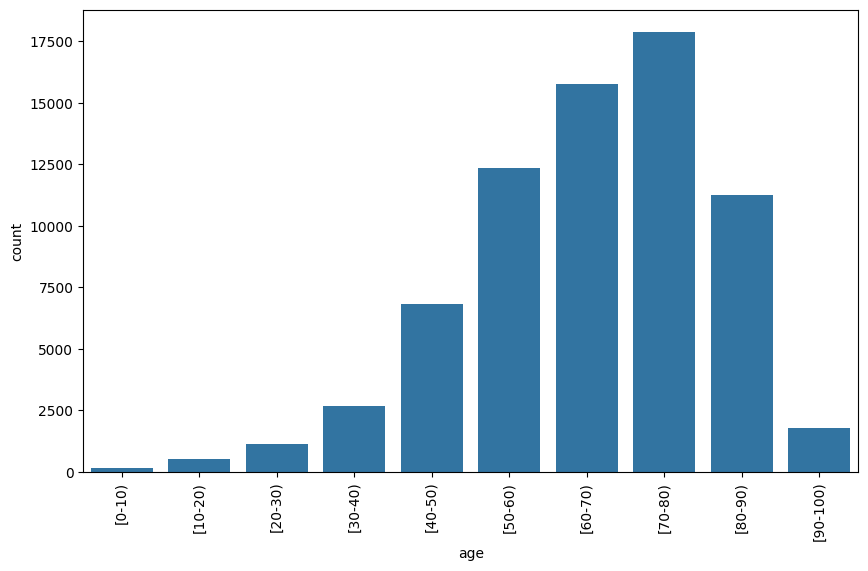


Pie Chart


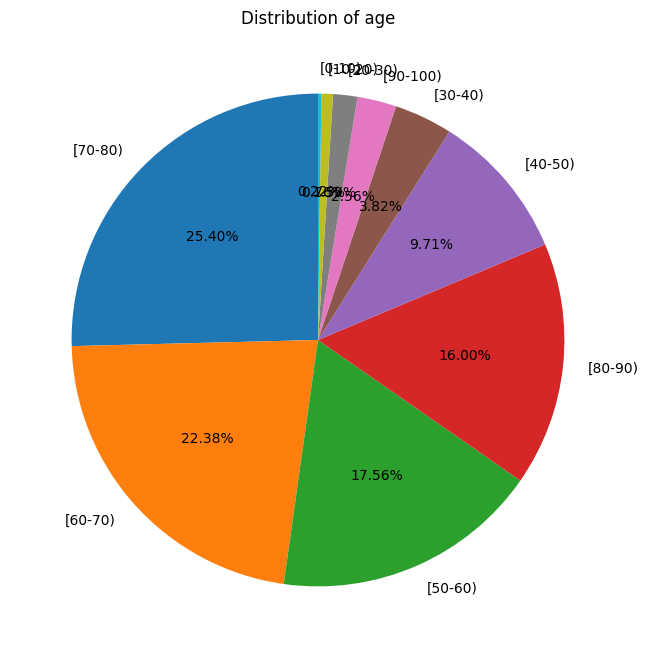




medical_specialty

Count Plot


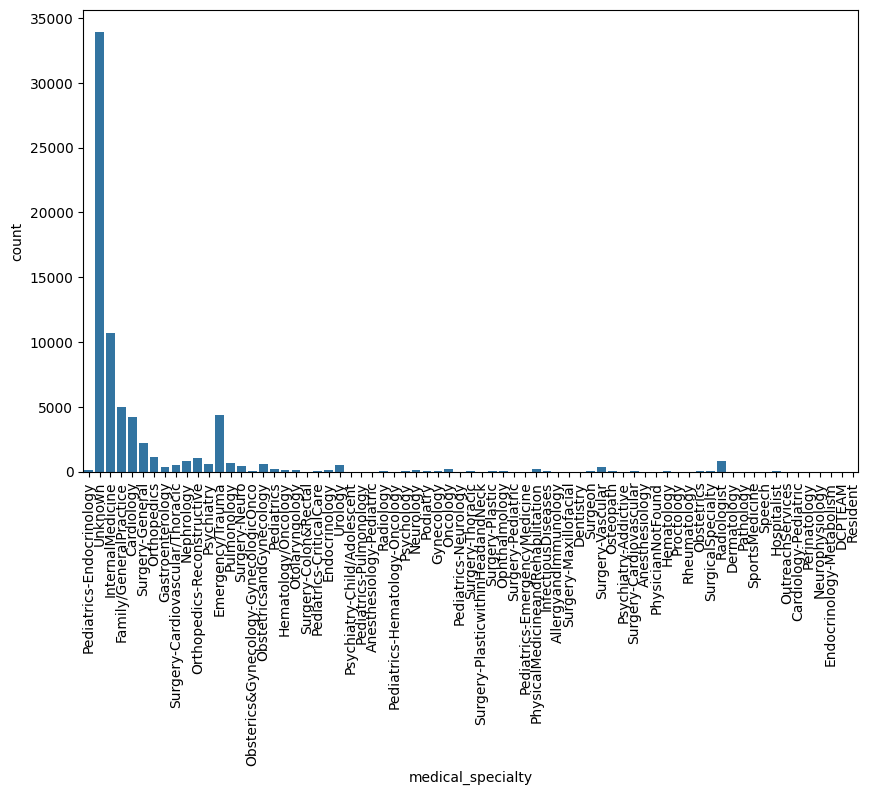


Pie Chart


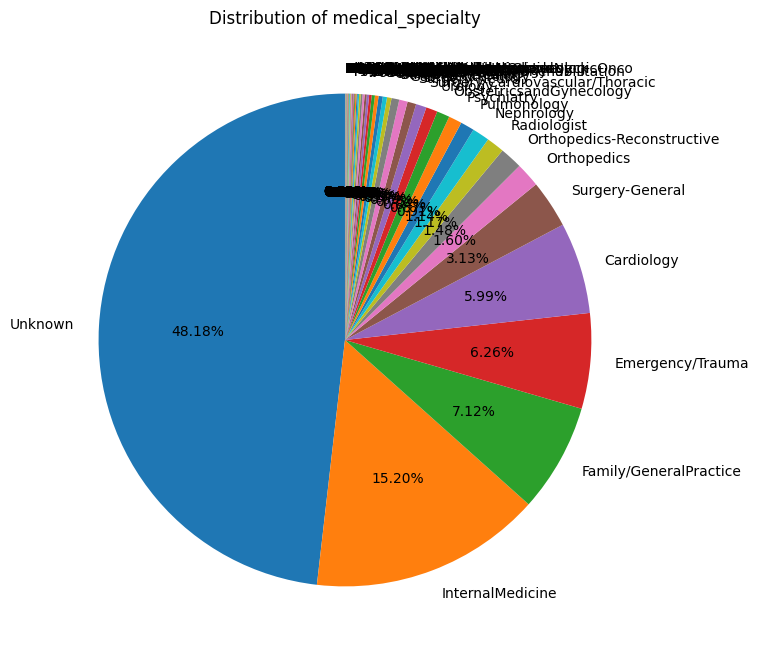




diag_1

Count Plot


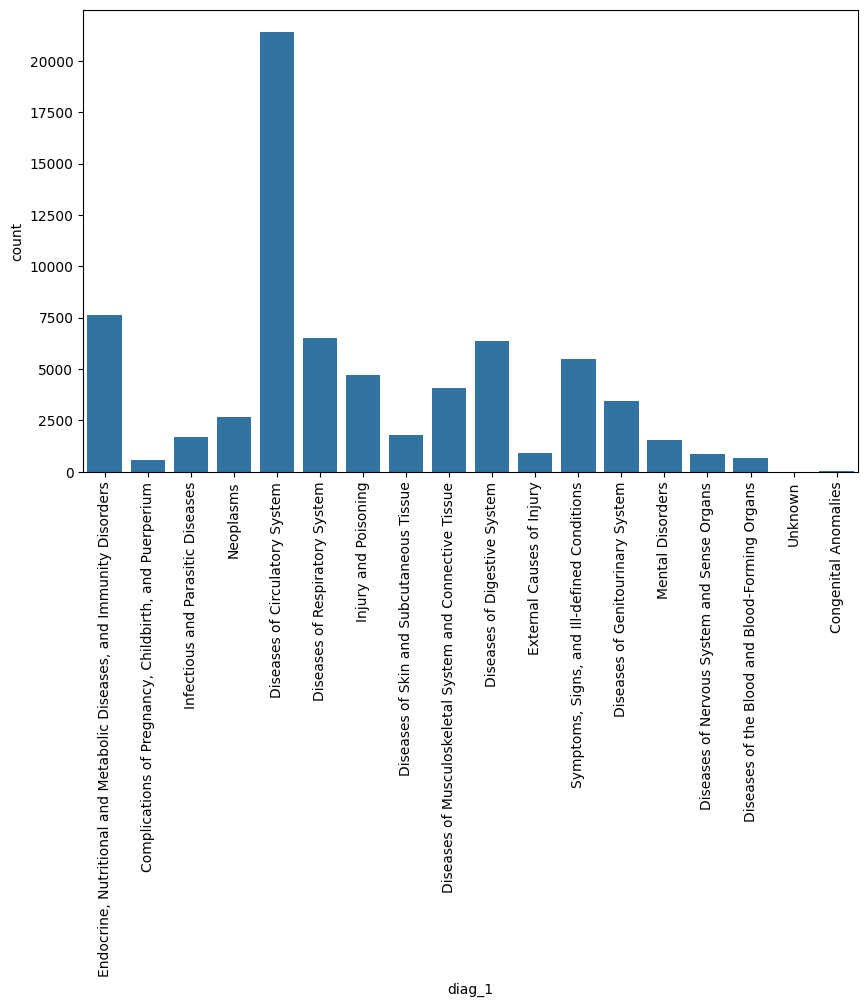


Pie Chart


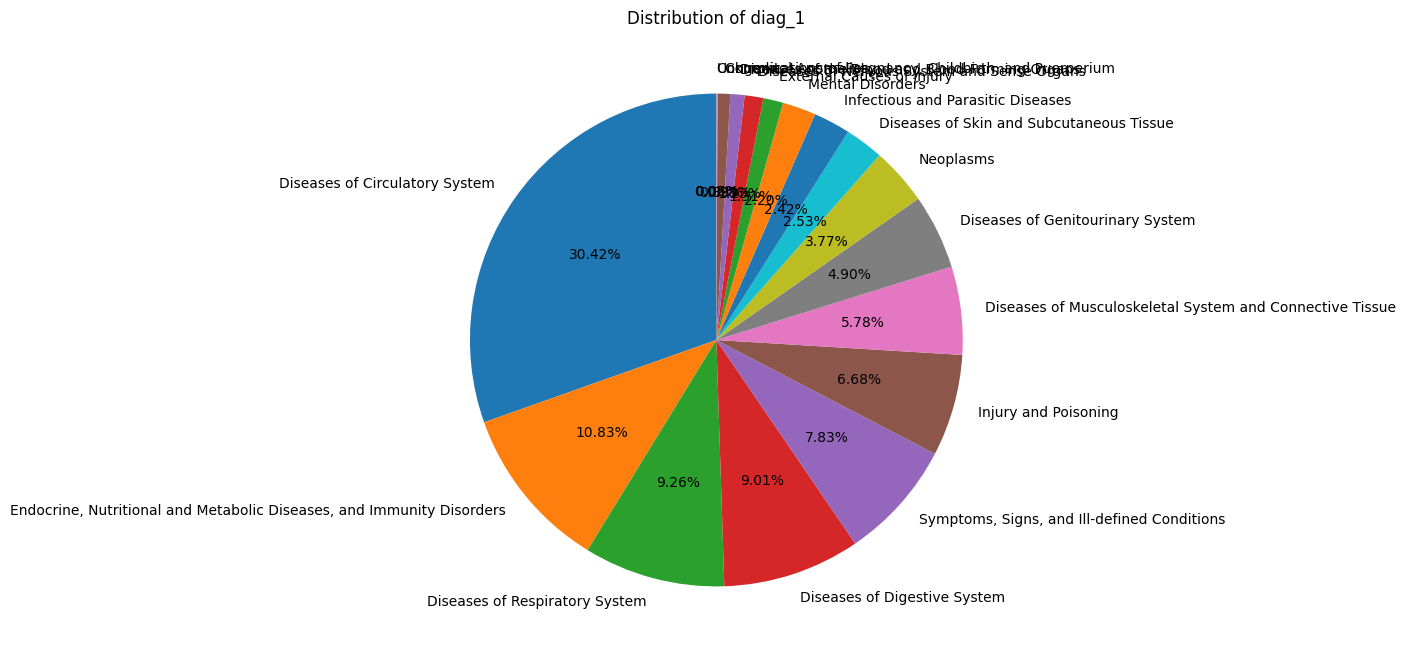




diag_2

Count Plot


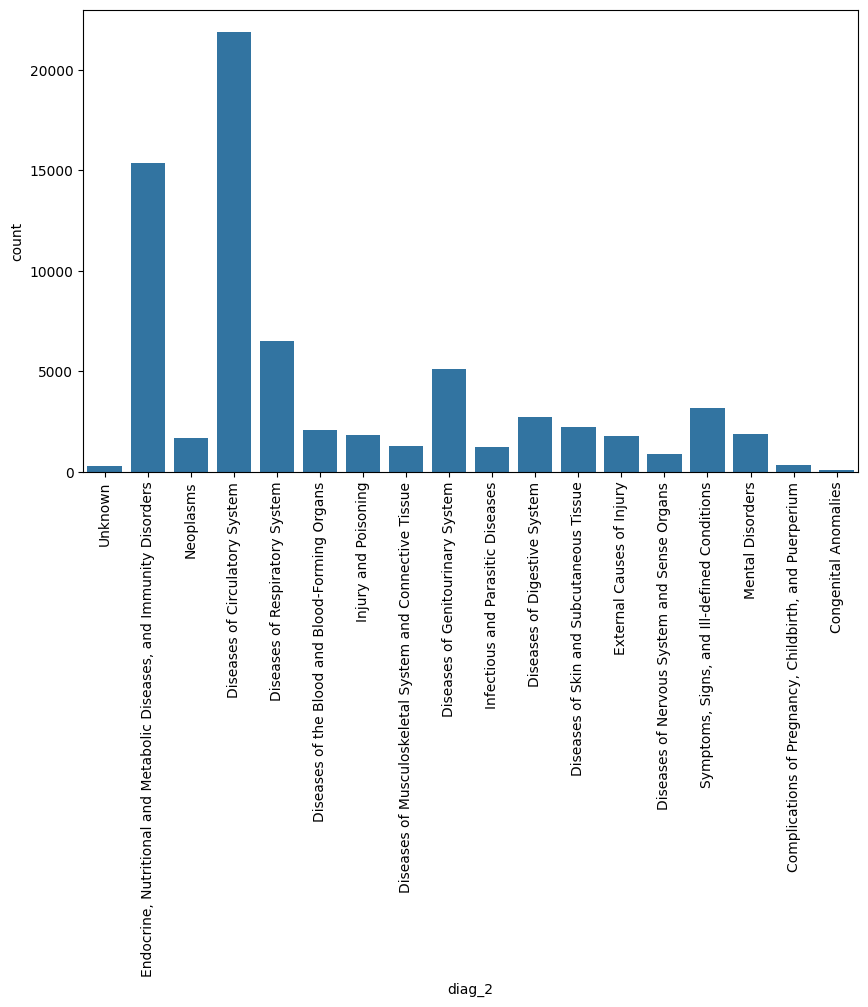


Pie Chart


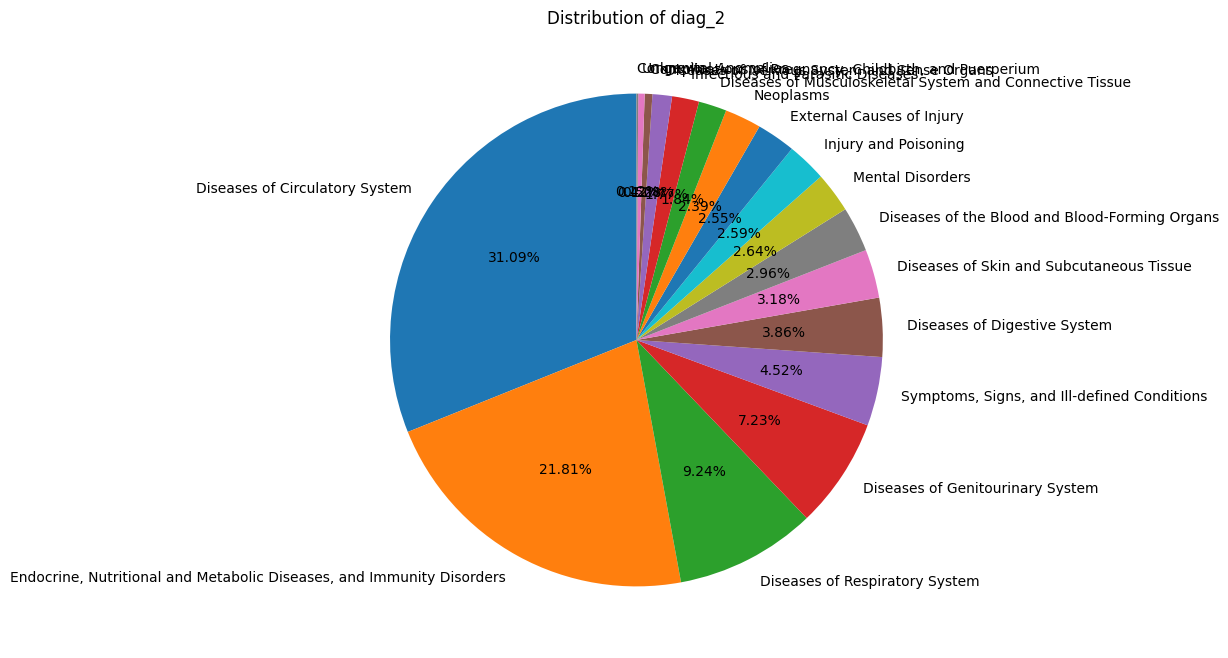




diag_3

Count Plot


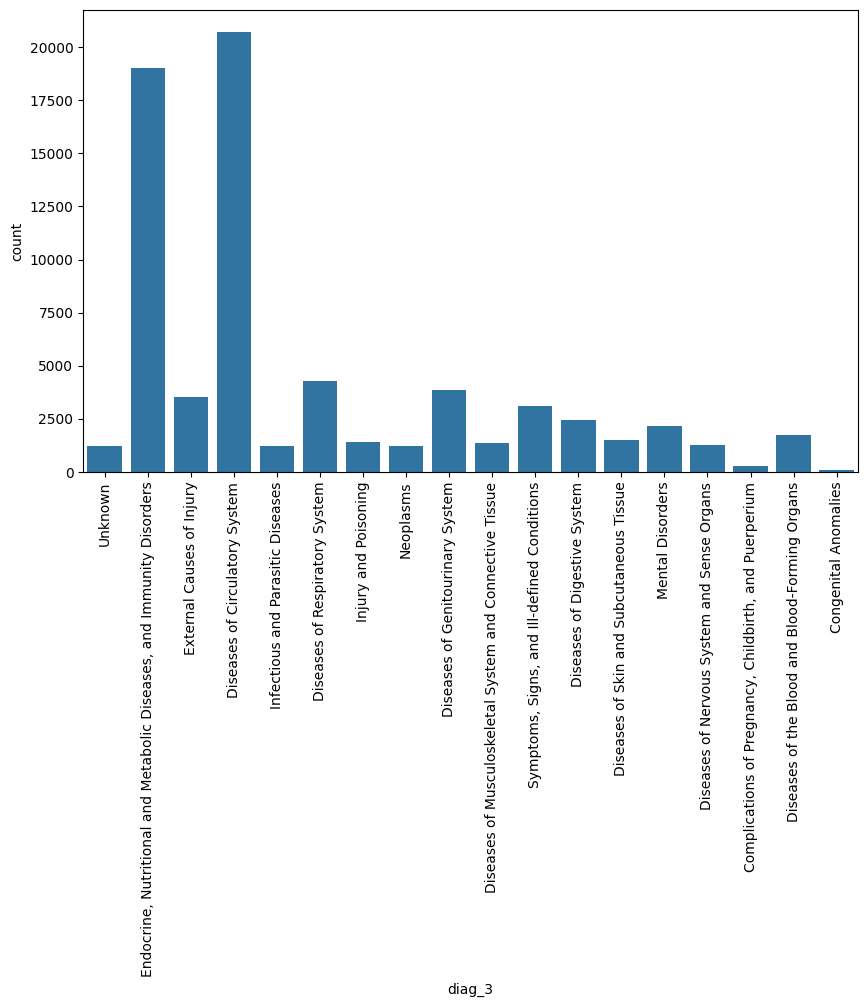


Pie Chart


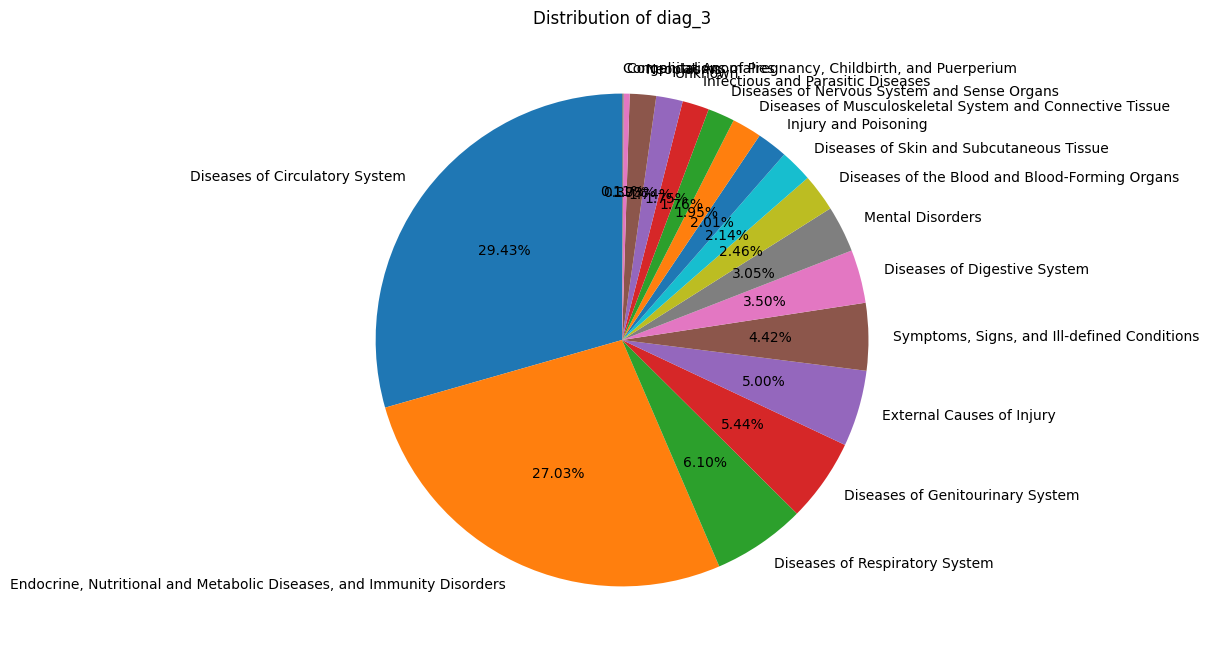




change

Count Plot


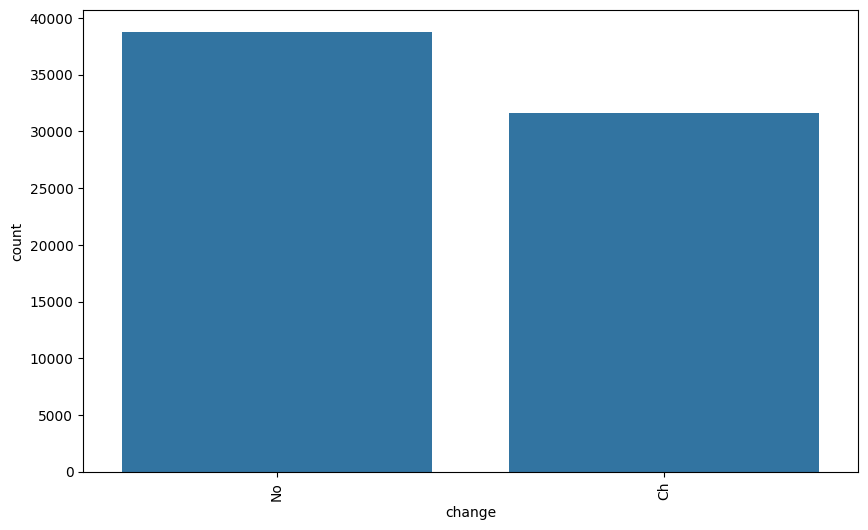


Pie Chart


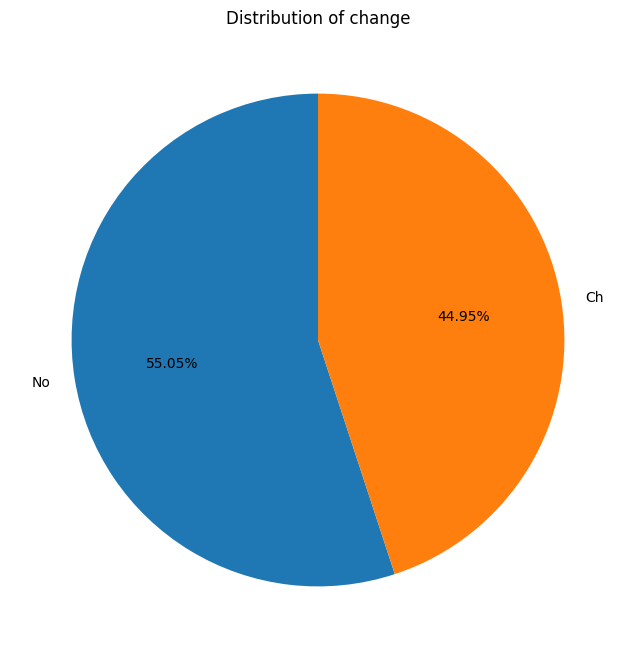




diabetesMed

Count Plot


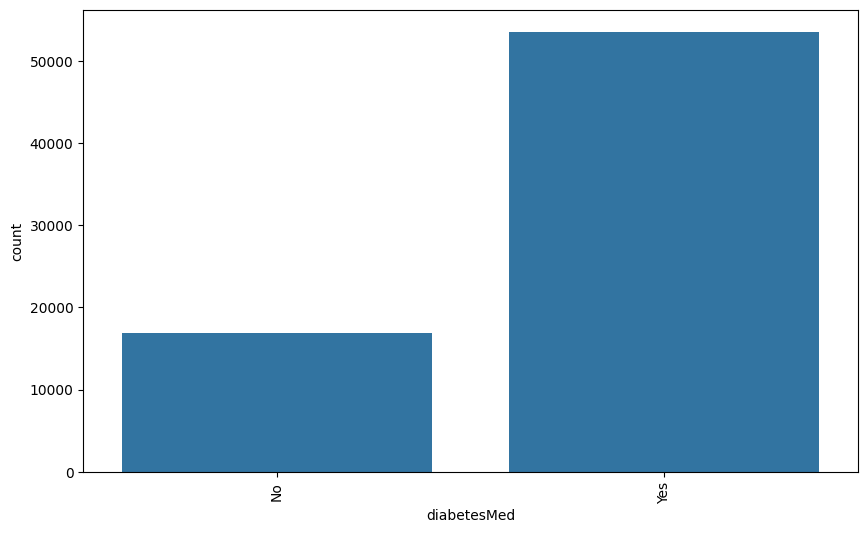


Pie Chart


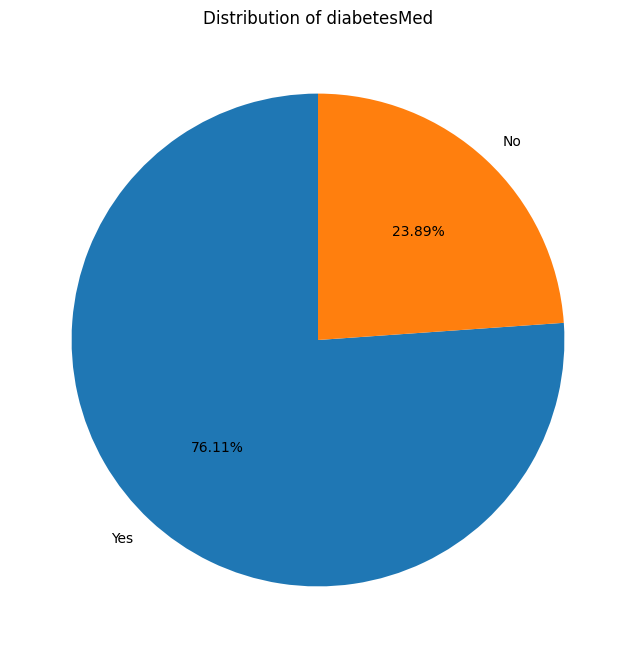




readmitted

Count Plot


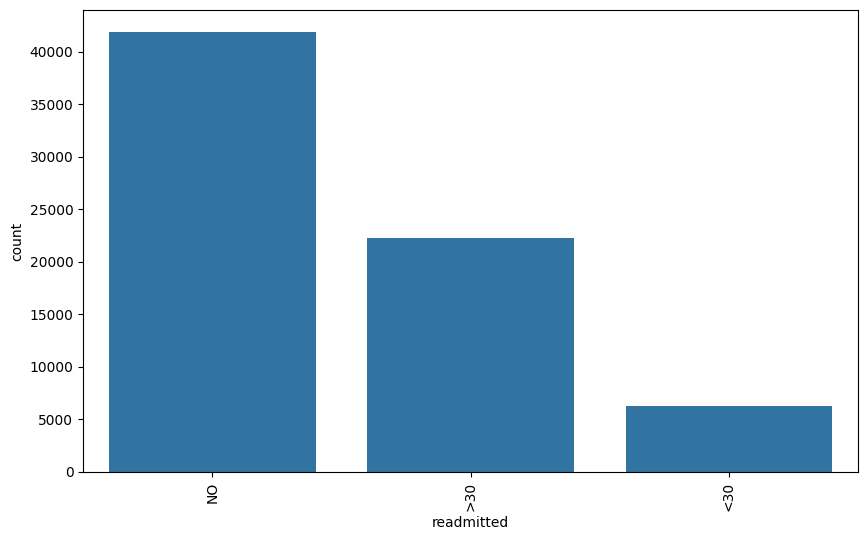


Pie Chart


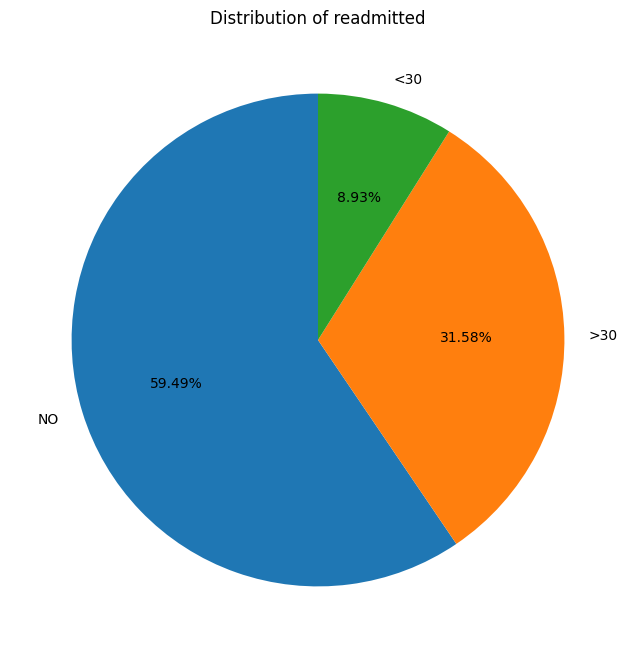




admission_type_desc

Count Plot


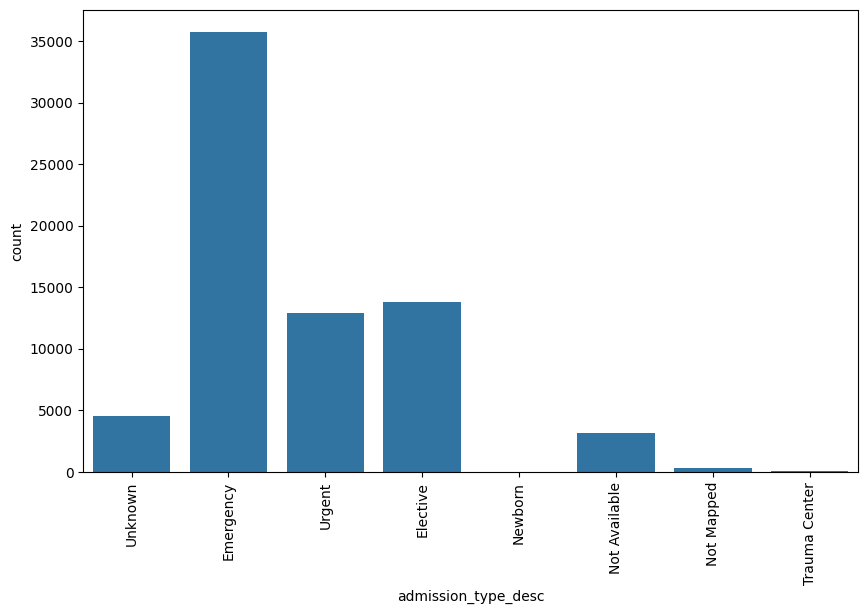


Pie Chart


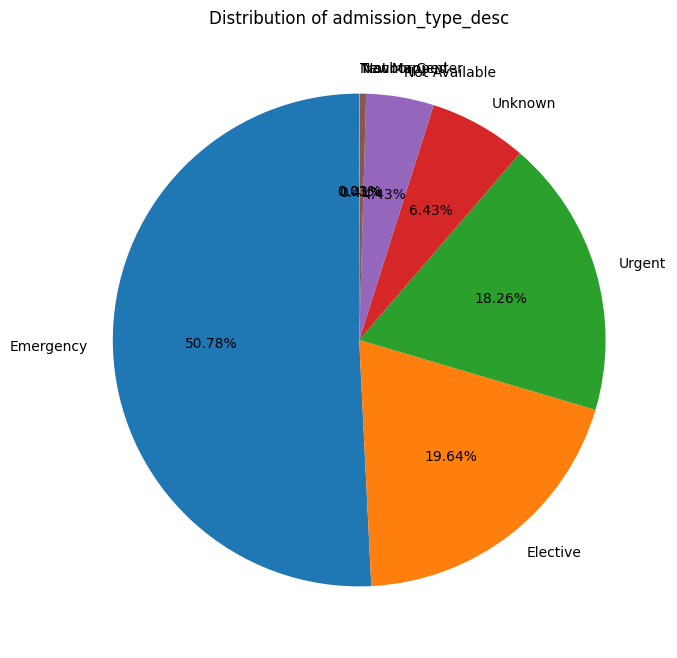




discharge_desc

Count Plot


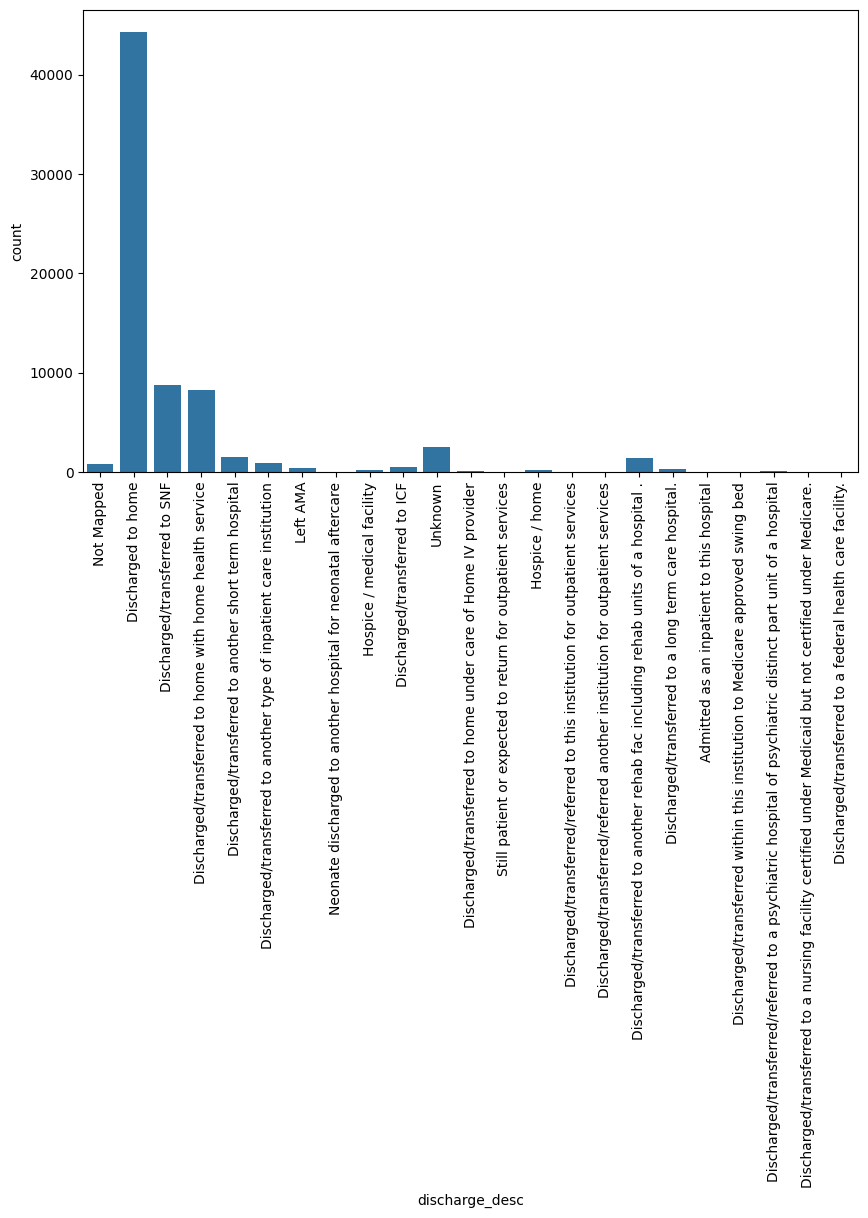


Pie Chart


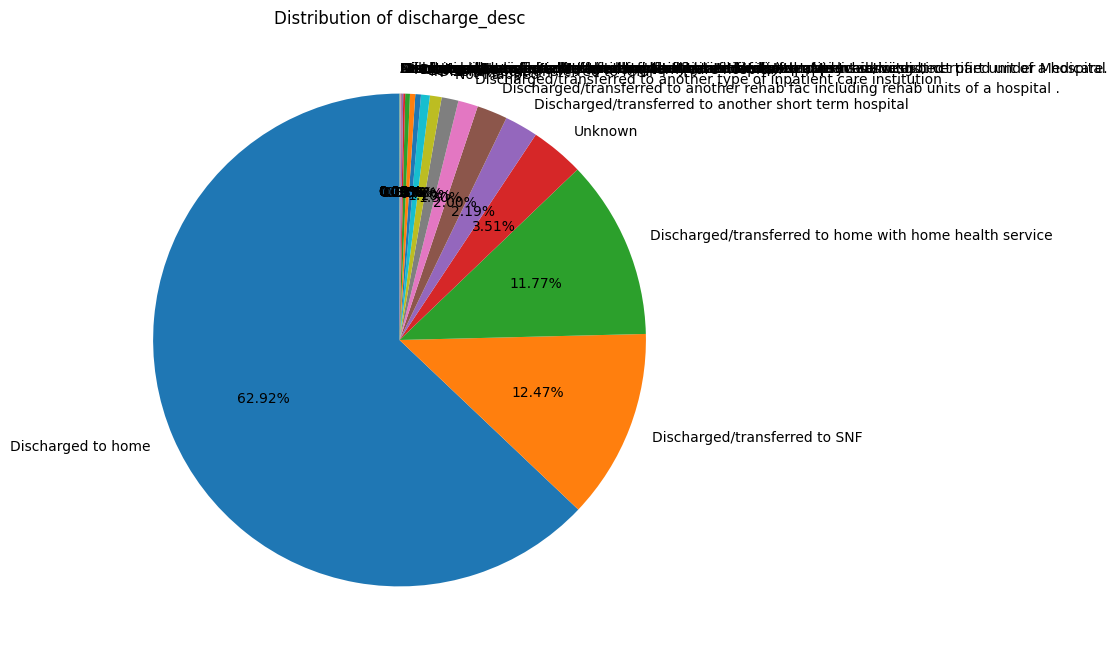




admission_source_desc

Count Plot


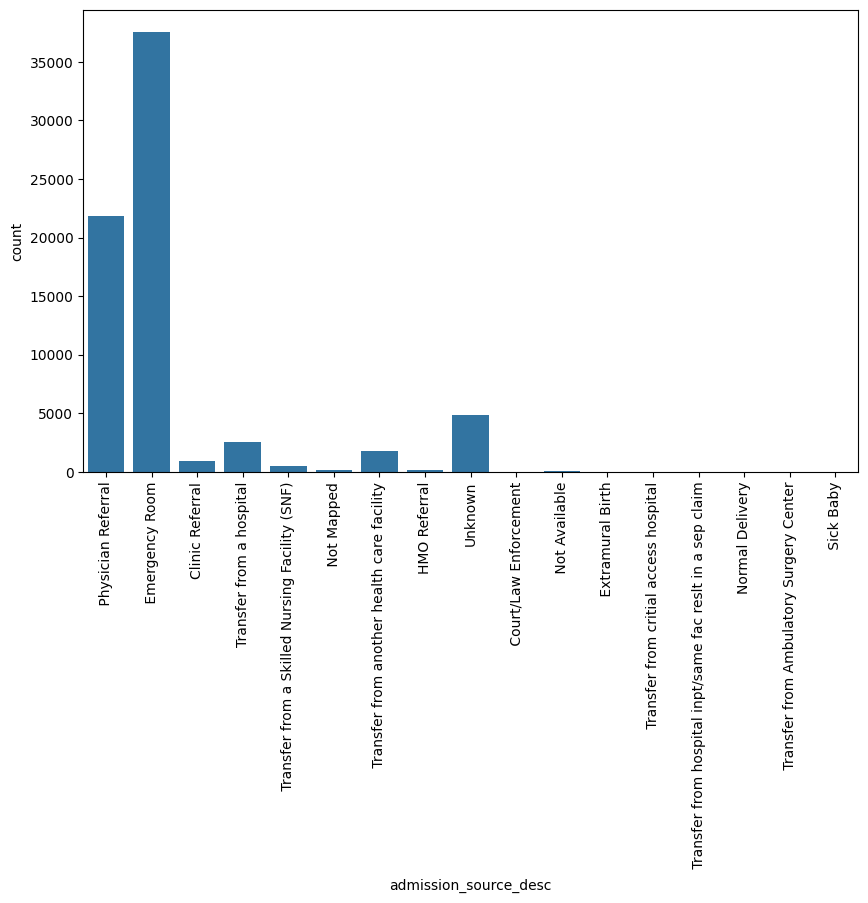


Pie Chart


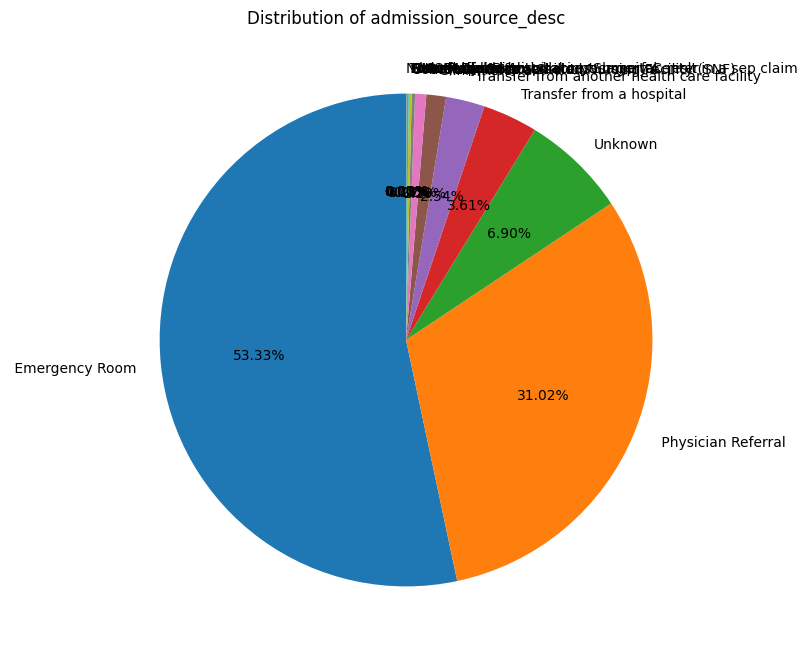




readmitted_binary

Count Plot


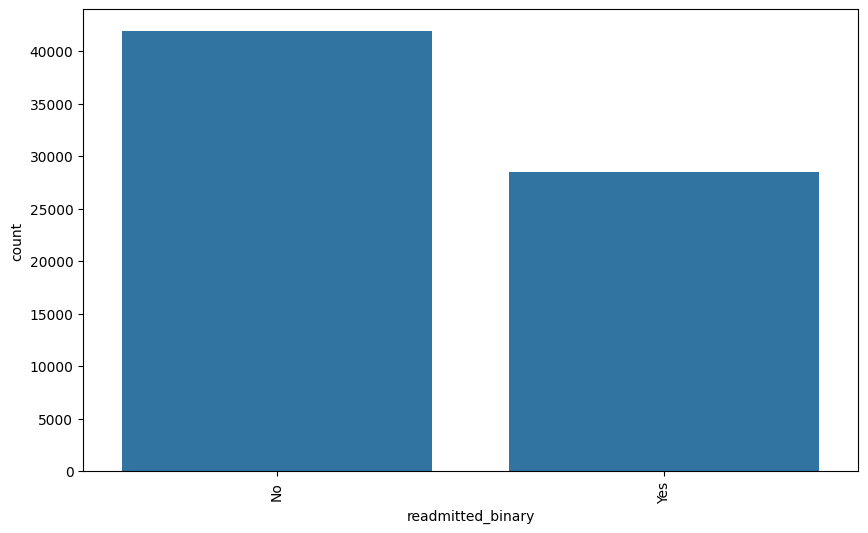


Pie Chart


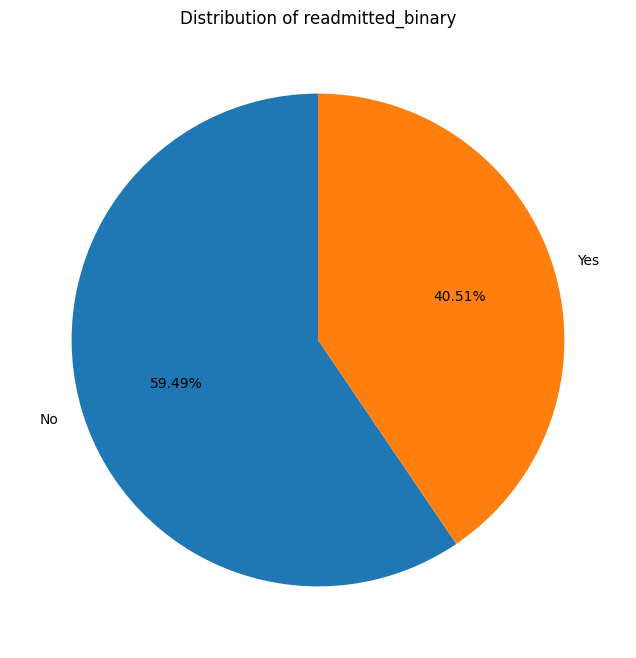

In [573]:
for i in non_drug_df:
    print('\n\033[1m'+i+'\033[0m')
    print('\nCount Plot')
    plt.figure(figsize=(10, 6))
    sns.countplot(data=non_drug_df, x=i)
    plt.xticks(rotation=90)
    plt.show()

    print('\nPie Chart')
    plt.figure(figsize=(8, 8))
    non_drug_df[i].value_counts().plot.pie(autopct='%1.2f%%', startangle=90)
    plt.ylabel('') # Hide the default ylabel
    plt.title(f'Distribution of {i}')
    plt.show()

    print('\n')
    print('=================================')

**Key Observations:**

## Bivariate Analysis

<Axes: xlabel='readmitted', ylabel='age'>

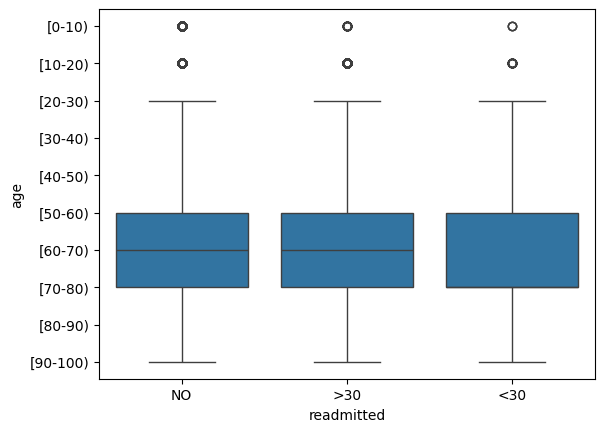

In [550]:
# boxplot of age with readmitted
sns.boxplot(x=df['readmitted'],y=df['age'])

<Axes: xlabel='readmitted', ylabel='gender'>

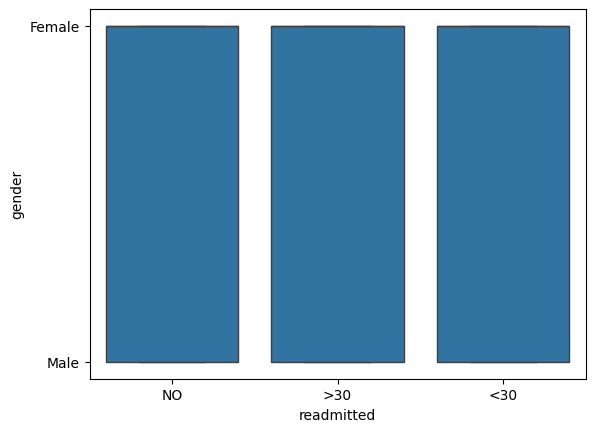

In [551]:
# boxplot of gender with readmitted
sns.boxplot(x=df['readmitted'],y=df['gender'])

<Axes: xlabel='gender', ylabel='count'>

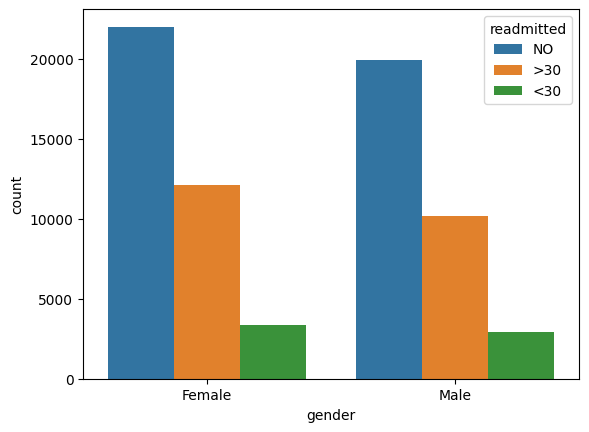

In [552]:
# countplot for gender with readmitted
sns.countplot(data=df, x = 'gender', hue='readmitted')

In [553]:
pd.crosstab(df['gender'], df['readmitted'], margins=True)  # cross tabulation of Age_group and survived columns

readmitted,<30,>30,NO,All
gender,,,,
Female,3370,12094,22004,37468
Male,2923,10146,19894,32963
All,6293,22240,41898,70431


In [554]:
# compute readmitted by gender - group by gender
#readmitted_by_gender = df.groupby('gender')['readmitted'].mean()
#readmitted_by_gender

##NOTE: Does not make sense!

/tmp/ipython-input-1815210144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='race', y='age', palette='rainbow')


<Axes: xlabel='race', ylabel='age'>

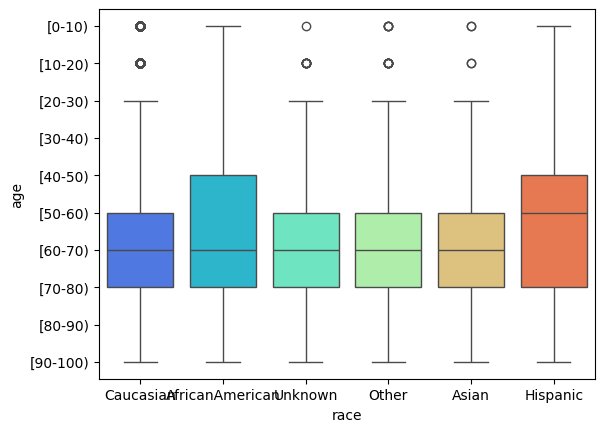

In [555]:
sns.boxplot(df, x='race', y='age', palette='rainbow')

In [556]:
df['admission_type_desc'].unique()

array(['Unknown', 'Emergency', 'Urgent', 'Elective', 'Newborn',
       'Not Available', 'Not Mapped', 'Trauma Center'], dtype=object)

In [557]:
pd.crosstab(df['age'], df['readmitted'], margins=True)  # cross tabulation of Age_group and survived columns

readmitted,<30,>30,NO,All
age,,,,
[0-10),3,24,126,153
[10-20),26,142,366,534
[20-30),83,277,762,1122
[30-40),188,689,1815,2692
[40-50),507,1945,4388,6840
[50-60),879,3734,7755,12368
[60-70),1414,4952,9396,15762
[70-80),1824,6132,9931,17887
[80-90),1201,3867,6199,11267


## Multivariate Analysis

## Summarize insights